# US Census Bureau 1994/95



__REFERENCE:__
The technical documentation provided on the official website of UCI with link: https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar95.pdf. The data for this survey came from the March 1995 Current Population Survey (CPS), conducted by the Bureau of the Census.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
census = pd.read_csv('/content/drive/My Drive/census_final.csv')
census.head()

,Unnamed: 0,age,class of worker,industry code,occupation code,education,wage per hour,enrolled in edu inst last wk,marital status,major industry code,major occupation code,race,hispanic Origin,sex,member of a labor union,reason for unemployment,full or part time employment stat,capital gains,capital losses,divdends from stocks,tax filer status,region of previous residence,state of previous residence,detailed household and family stat,detailed household summary in household,instance weight,migration code-change in msa,migration code-change in reg,migration code-move within reg,live in this house 1 year ago,migration prev res in sunbelt,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,YEAR,total person income
0,0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,?,?,?,Not in universe under 1 year old,?,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,-50000
1,1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Head of household,South,Arkansas,Householder,Householder,1053.55,MSA to MSA,Same county,Same county,No,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,-50000
2,2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in universe,Not in labor force,0,0,0,Nonfiler,Not in universe,Not in universe,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,?,?,?,Not in universe under 1 year old,?,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,-50000
3,3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1758.14,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000
4,4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in universe,Children or Armed Forces,0,0,0,Nonfiler,Not in universe,Not in universe,Child <18 never marr not in subfamily,Child under 18 never married,1069.16,Nonmover,Nonmover,Nonmover,Yes,Not in universe,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,-50000


In [0]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292550 entries, 0 to 292549
Data columns (total 43 columns):
Unnamed: 0                                    292550 non-null int64
age                                           292550 non-null int64
class of worker                               292550 non-null object
industry code                                 292550 non-null int64
occupation code                               292550 non-null int64
education                                     292550 non-null object
wage per hour                                 292550 non-null int64
enrolled in edu inst last wk                  292550 non-null object
marital status                                292550 non-null object
major industry code                           292550 non-null object
major occupation code                         292550 non-null object
race                                          292550 non-null object
hispanic Origin                               292550 non-null obje

## EDA:

Let's perform EDA and then if required bucketing of the following columns:
- 'industry code'
- 'occupation code'
- 'wage per hour'
- 'major industry code'
- 'major occupation code'
- 'class of worker'
- 'member of a labor union'
- 'region of previous residence'
- 'state of previous residence'

In [0]:
# consider the following the dataframe:
df = census[['age','industry code', 'occupation code', 'wage per hour', 'major industry code', 'major occupation code', 'class of worker', 'member of a labor union', 'region of previous residence', 'state of previous residence', 'own business or self employed ','capital gains', 'divdends from stocks', 'veterans benefits','total person income']]
df.head()

,age,industry code,occupation code,wage per hour,major industry code,major occupation code,class of worker,member of a labor union,region of previous residence,state of previous residence,own business or self employed,capital gains,divdends from stocks,veterans benefits,total person income
0,73,0,0,0,Not in universe or children,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,0,0,0,2,-50000
1,58,4,34,0,Construction,Precision production craft & repair,Self-employed-not incorporated,Not in universe,South,Arkansas,0,0,0,2,-50000
2,18,0,0,0,Not in universe or children,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,0,0,0,2,-50000
3,9,0,0,0,Not in universe or children,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,0,0,0,0,-50000
4,10,0,0,0,Not in universe or children,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,0,0,0,0,-50000


#### Industry Code:

Industry code represents the code of the industry in which an employed individual works.

In [0]:
sorted(df['industry code'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

According to the documentation, There are 236 categories for the employed, with 1 additional category for the experienced unemployed. These categories are aggregated into 51 detailed groups. Therefore industry code is a categorical variable. Let's try to find out the it's distplot:

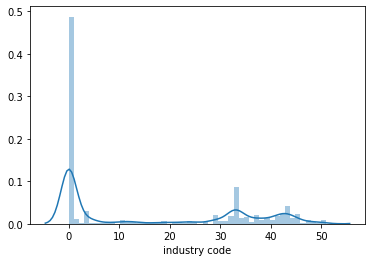

In [0]:
sns.distplot(df['industry code'])

plt.show()

The above distribution plot shows that most of data is present around group number 0.


Let's try bucketing the feature according to the respective major group category as per provided in documentation:

In [0]:
df['industry code'][df['industry code']==0] = 0
df['industry code'][(df['industry code']==1) | (df['industry code']==2) | (df['industry code']==46)] = 1
df['industry code'][df['industry code']==3] = 2
df['industry code'][df['industry code']==4] = 3
df['industry code'][(df['industry code']>=5) & (df['industry code']<=28)] = 4
df['industry code'][(df['industry code']>=29) & (df['industry code']<=31)] = 5
df['industry code'][(df['industry code']==32) | (df['industry code']==33)] = 6
df['industry code'][(df['industry code']==34) | (df['industry code']==35)] = 7
df['industry code'][(df['industry code']>=36) & (df['industry code']<=45)] = 8
df['industry code'][(df['industry code']>=47) & (df['industry code']<=50)] = 9
df['industry code'][df['industry code']==51] = 10

df['industry code'] = df['industry code'].astype(str)

df['industry code'][(df['industry code']=='0') & (df['age'] <= 15)] = 'Children'
df['industry code'][(df['industry code']=='0') & (df['age'] >= 15)] = ' Not in universe'
df['industry code'][df['industry code']=='1'] = 'Agriculture, Forestry and Fisheries'
df['industry code'][df['industry code']=='2'] = 'Mining'
df['industry code'][df['industry code']=='3'] = 'Construction'
df['industry code'][df['industry code']=='4'] = 'Manufacturing'
df['industry code'][df['industry code']=='5'] = 'Transportation and public utilities'
df['industry code'][df['industry code']=='6'] = 'Wholesale and retail trade'
df['industry code'][df['industry code']=='7'] = 'Finance, insurance and real estate'
df['industry code'][df['industry code']=='8'] = 'Services'
df['industry code'][df['industry code']=='9'] = 'Public administration'
df['industry code'][df['industry code']=='10'] = 'Armed Forces'
df['industry code'][(df['industry code']==' Not in universe') & (df['age']<=19)] = 'Unemployed or studying'

df['industry code'].unique()

array([' Not in universe', 'Construction', 'Unemployed or studying',
       'Children', 'Services', 'Finance, insurance and real estate',
       'Manufacturing', 'Mining', 'Transportation and public utilities',
       'Wholesale and retail trade', 'Public administration',
       'Agriculture, Forestry and Fisheries', 'Armed Forces'],
      dtype=object)

After bucketing, these are the groups that we get with the description of each bucket:
- 'Construction' : all the employees who were in cosntructions.
- 'Services' : It includes all the services like, Private Households, Educational Services, Healthcare related services and other Industrial services.
- 'Finance, insurance and real estate' : emplpoyees who are involved in Finance, insurance and real estate related firms
- 'Manufacturing' : Durable and Non-durable goods come under this category.
- 'Mining'
- 'Transportation and public utilities' : Public Transportation and communications come under this category.
- 'Wholesale and retail trade' : Trading of Wholsale and retail materials.
- 'Public administration' : Justice, public order and safety, Administration of HR programs, National securities and other public administration
- 'Agriculture, Forestry and Fisheries': Agriculture and all related Services and Forestry and Fisheries
- 'Armed Forces' : This consists of people from Armed Forces also armed forces as last job and currently working somewhere else or unemployed.
- ' Not in universe' : No records for this category
- 'Children' : All other people, who are not employees and below age 16 are children
- 'Unemployed or studying' : All the records where no occupation code is present and age is also below 20. This represents record which either have completed their school and looking for job or have completed their school and studying higher education 

##### Countplot:

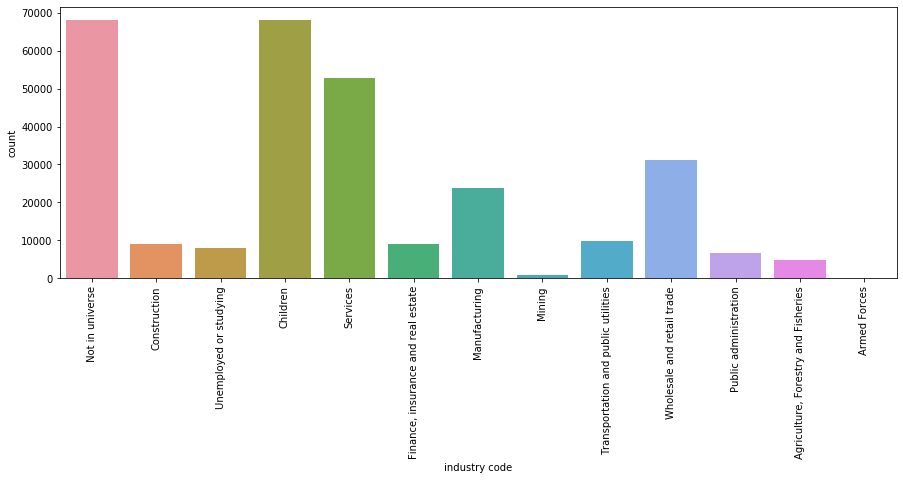

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(df['industry code']).set_xticklabels(sns.countplot(df['industry code']).get_xticklabels(), rotation=90)
plt.show()

This shows a lot of data is missing, we have to drop this variable if found not important in Hypothesis Testing.

#### Occupation Code:
Occupation code represents the code of the post / occupation of an employed / self-employed individual.

In [0]:
sorted(df['occupation code'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46]

According to the documentation, There are 500 categories for the employed with 1 additional category for the experienced unemployed. These categories are aggregated into 46 detailed groups. This is categorical variable and thus we need to find its countplot / distribution plot.

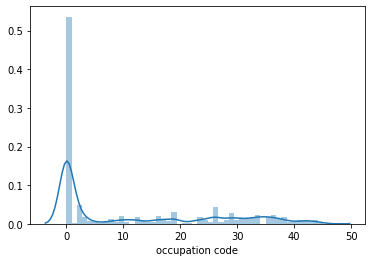

In [0]:
sns.distplot(df['occupation code'])
plt.show()

Majority of data is present in group 0, Now let's try bucketing to make our data representation better.

In [0]:
df['occupation code'][df['occupation code']== 0] = 0
df['occupation code'][(df['occupation code'] >= 1) & (df['occupation code'] <= 12)] = 1
df['occupation code'][(df['occupation code'] >= 13) & (df['occupation code'] <= 26)] = 2
df['occupation code'][(df['occupation code'] >= 27) & (df['occupation code'] <= 32)] = 3
df['occupation code'][(df['occupation code'] >= 33) & (df['occupation code'] <= 35)] = 4
df['occupation code'][(df['occupation code'] >= 36) & (df['occupation code'] <= 42)] = 5
df['occupation code'][(df['occupation code'] >= 43) & (df['occupation code'] <= 45)] = 6
df['occupation code'][(df['occupation code']==46)] = 7

df['occupation code'] = df['occupation code'].astype(str)
df['occupation code'][(df['occupation code']=='0') & (df['age'] <= 15)] = 'Children'
df['occupation code'][(df['occupation code']=='0') & (df['age'] >= 15)] = ' Not in universe'
df['occupation code'][df['occupation code']=='1'] = 'Managerial and professional speciality'
df['occupation code'][df['occupation code']=='2'] = 'Technical, sales and administrative support'
df['occupation code'][df['occupation code']=='3'] = 'Service Occupations'
df['occupation code'][df['occupation code']=='4'] = 'Precision production, craft and repair'
df['occupation code'][df['occupation code']=='5'] = 'Operators, fabricators and laborers'
df['occupation code'][df['occupation code']=='6'] = 'Farming, forestry and fishing'
df['occupation code'][df['occupation code']=='7'] = 'Armed Forces'
df['occupation code'][(df['occupation code']==' Not in universe') & (df['age']<=19)] = 'Unemployed or studying'

df['occupation code'].unique()

array([' Not in universe', 'Precision production, craft and repair',
       'Unemployed or studying', 'Children',
       'Managerial and professional speciality',
       'Operators, fabricators and laborers',
       'Technical, sales and administrative support',
       'Service Occupations', 'Farming, forestry and fishing',
       'Armed Forces'], dtype=object)

After Bucketing these are the buckets that we get with there respective description:
- 'Managerial and professional speciality' : These are the highest paid occupations. They earn more than everyone and comparatively lower in number.
- 'Technical, sales and administrative support' : These guys are the next to get paid highest after managerial and professional specialty guys.
- 'Service Occupations' : This occupation group mostly consists of services related to Private Household and protective service.
- 'Precision production, craft and repair' : This guys mostly provide service related productions and repairing.
- 'Operators, fabricators and laborers' : These are the lowest in the ladder of occupation hierarchy and getting lowest payments.
- 'Armed Forces' : This consists of people from Armed Forces also armed forces as last job and currently working somewhere else or unemployed.
- 'Children' : All the records where no occupation code is present and age is also below 16.
- 'Unemployed or studying' : All the records where no occupation code is present and age is also below 20. This represents record which either have completed their school and looking for job or have completed their school and studying higher education 
- ' Not in universe' : All the other records with no data available.

##### Countplot:

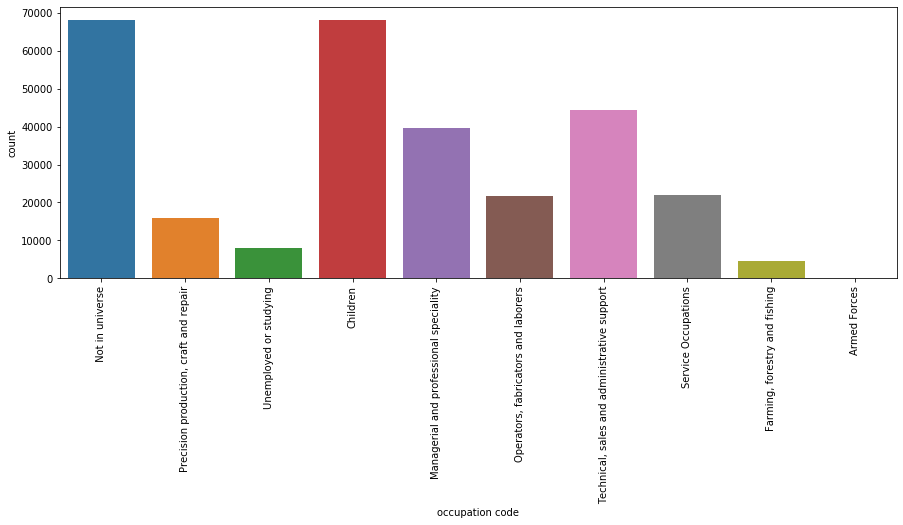

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(df['occupation code']).set_xticklabels(sns.countplot(df['occupation code']).get_xticklabels(), rotation=90)
plt.show()

This shows a lot of data is missing, we have to drop this variable if found not important in Hypothesis Testing.

#### Wage per hour:

This shows hourly earning of an individual if he is working. There are 2 major types of employments, Part time and full time workers. Out of them, wage per hour represents usual hourly earnings from both the current job (Part Time) and earnings from the longest job (Full Time).

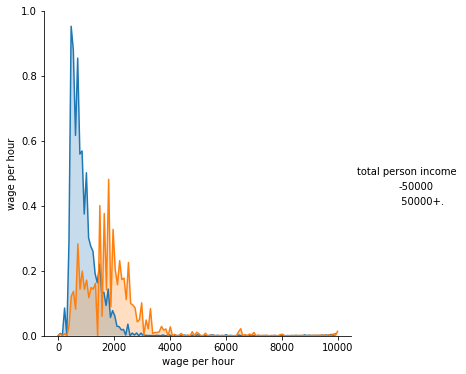

In [0]:
sns.pairplot(data = df[['wage per hour','total person income']], hue='total person income', diag_kind='kde', height=5)
plt.show()

Wage per hour data is contineous and there is a clear overlap between both the categories of below and above 50k person income's segments. Wage per hour data is very much important to find out the income of an individual but distribution is very much right skewed and we can use such data directly. Therefore we have to convert the data in normal format or at least remove the skewness so that we can analyse it.


Also, we can not try converting the data into per day earning because we don't have sufficient data to find out how much a day an individual works.


Therefore we have to try transforming techniques to bring it in format in which we can analyse it.

#### Major Industry Code:

This code represents groups of all the industry codes into 23 major groups.


We have already did this in above industry code variable bucketing with forming less amount of groups, 11 and also we have added extra groups like 'Children' and 'Unemployed or studying' which gives further clearity in understanding the other variables.


Therefore we will drop this column.

#### Major Occupation Code:
This code represents groups of all the industry codes into 14 major groups.


We have already did this in above occupation code variable bucketing with forming less amount of groups, 7 and also we have added extra groups like 'Children' and 'Unemployed or studying' which gives further clearity in understanding the other variables.


Therefore we will drop this column.

#### Class of Worker:

This refers to the broad classification of the person's employer.

In [0]:
print("following are the classes:", df['class of worker'].unique())

following are the classes: [' Not in universe' ' Self-employed-not incorporated' ' Private'
 ' Local government' ' Federal government' ' Self-employed-incorporated'
 ' State government' ' Never worked' ' Without pay']


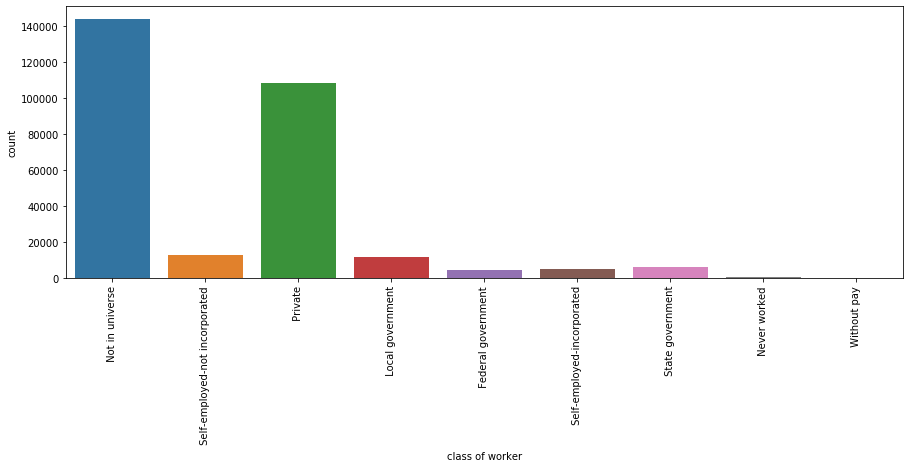

In [0]:
df['class of worker'] = census['class of worker']
plt.figure(figsize=(15,5))
sns.countplot(df['class of worker']).set_xticklabels(sns.countplot(df['class of worker']).get_xticklabels(), rotation=90)
plt.show()

The above countplot represents that most of the data is present in 'Not in universe', which represents data of Not in universe or children or Armed Forces. Therefore we have to seperate that data and try out bucketing.

In [0]:
df['class of worker'] = census['class of worker']

df['class of worker'][(df['class of worker']==' Not in universe') & (df['industry code']=='Children')] = 'Children'
df['class of worker'][(df['class of worker']==' Not in universe') & (df['occupation code']=='Unemployed or studying')] = 'Unemployed or studying'
df['class of worker'][(df['class of worker']==' Not in universe') & ((df['capital gains'] != 0) | (df['divdends from stocks'] != 0 | (df['veterans benefits'] == 1)))] = 'beneficiary or investor'
df['class of worker'][(df['class of worker']==' Self-employed-incorporated')] = ' Private'
df['class of worker'][(df['class of worker']==' Local government') | (df['class of worker']==' Federal government') | (df['class of worker']==' State government')] = ' Government'
df['class of worker'][(df['class of worker']==' Self-employed-not incorporated')] = ' Self-employed'

df['class of worker'].unique()

array([' Not in universe', ' Self-employed', 'Unemployed or studying',
       'Children', ' Private', ' Government', 'beneficiary or investor',
       ' Never worked', ' Without pay'], dtype=object)

After bucketing, we get following classes:
- ' Self-employed' : Self-employed persons are those who work for profit or fees in their own business, profession or trade, or operate a farm.
- ' Private' : All the persons working in private industry or self-employed incorporated
- ' Government' : All the federal, state and local government working persons.
- ' Never worked' : A person who has never held a full-time civilian job lasting two consecutive weeks or more.
- ' Without pay' : This includes persons worked without pay on a family-operated farm or business at any time during the year, on a part-time or full-time basis.
- 'Unemployed or studying' : All the records where no occupation code is present and age is also below 20. This represents record which either have completed their school and looking for job or have completed their school and studying higher education
- 'Children' : All the records where no occupation code is present and age is also below 16.
- 'beneficiary or investor' : Those who receives Veteran Benefits or have some investments in Stocks or capital gains.
- ' Not in universe' : Person with missing data.

##### Countplot:

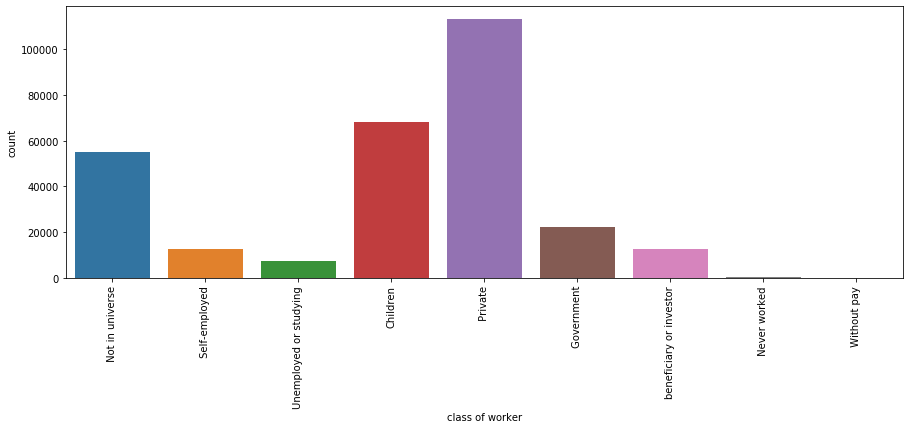

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(df['class of worker']).set_xticklabels(sns.countplot(df['class of worker']).get_xticklabels(), rotation=90)
plt.show()

Even though here we get the same 9 groups, but we can see clear changes in the group counts. Now missing data is reduced a lot and now we can make more clear inferences out of it.

#### Member of a labor union:

This represents a member of a labor union or of an employee association similar to a union. It is a labor specific data, means if someone is working then is he associated with any kind of union.

In [0]:
print("It consists of",df['member of a labor union'].unique())

It consists of [' Not in universe' ' No' ' Yes']


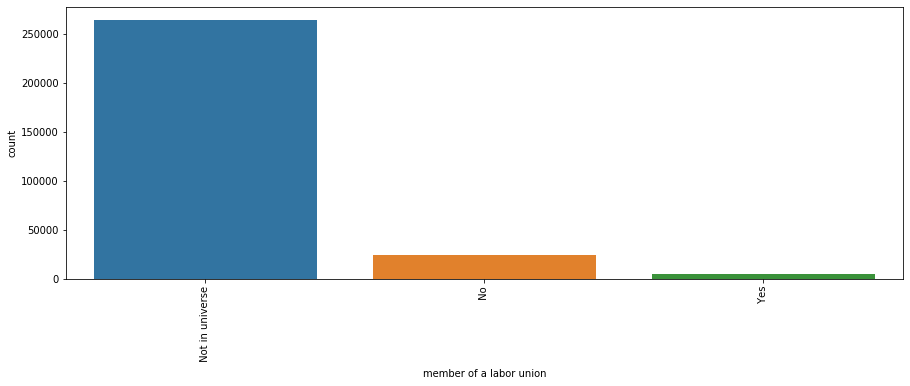

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(df['member of a labor union']).set_xticklabels(sns.countplot(df['member of a labor union']).get_xticklabels(), rotation=90)
plt.show()

Most of data is present in 'Not in universe' group but it also consists of Children or Armed Forces data, So let's convert and find that data:

In [0]:
df['member of a labor union'][(df['member of a labor union'] == ' Not in universe') & ((df['occupation code'] == 'Children') | (df['occupation code'] == 'Armed Forces'))] = ' Not applicable'

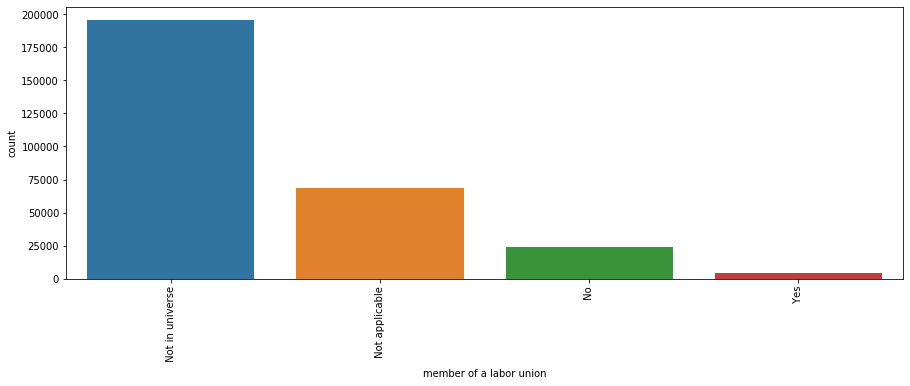

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(df['member of a labor union']).set_xticklabels(sns.countplot(df['member of a labor union']).get_xticklabels(), rotation=90)
plt.show()

Though There is a big amount of data that is reduced from 'Not in universe' but still all the remaining missing data is too much.


And with so much data missing it won't make any sense to keep this variable, so we will drop it.

#### region of previous residence:

This is a migration related data, it shows region before migration where was an individual living. Let's check the data first.

In [0]:
df['region of previous residence'].value_counts() / df.shape[0] * 100

 Not in universe    92.012989
 South               2.489147
 West                2.084088
 Midwest             1.791147
 Northeast           1.372415
 Abroad              0.250214
Name: region of previous residence, dtype: float64

92% of data is missing. So it's better to drop this column.

#### State of previous residence:
This is a migration related data, it shows state before migration where was an individual living. Let's check the data first.

In [0]:
(df['state of previous residence'].value_counts() / df.shape[0] * 100).head()

 Not in universe    92.012989
 California          0.884293
 Utah                0.544180
 Florida             0.442318
 North Carolina      0.412237
Name: state of previous residence, dtype: float64

92% of data is missing. So it's better to drop this column.

__This is the final selected variables:__
- industry code
- occupation code
- class of worker
- wage per hour

In [0]:
final_df = df[['industry code','occupation code','class of worker','wage per hour']]
final_df.head()

,industry code,occupation code,class of worker,wage per hour
0,Not in universe,Not in universe,Not in universe,0
1,Construction,"Precision production, craft and repair",Self-employed,0
2,Unemployed or studying,Unemployed or studying,Unemployed or studying,0
3,Children,Children,Children,0
4,Children,Children,Children,0


Let's perform EDA and then if required bucketing of the following columns:

-  'capital gains'
- 'capital losses'
- 'divdends from stocks'
- 'marital status'
- 'race'
- 'hispanic Origin'
- 'sex'
- 'detailed household and family stat'
- 'detailed household summary in household'

In [0]:
# consider following dataframe:
df = census[['capital gains', 'capital losses', 'divdends from stocks','marital status','race','sex','hispanic Origin','detailed household and family stat',
       'detailed household summary in household','total person income']]
df.head()

,capital gains,capital losses,divdends from stocks,marital status,race,sex,hispanic Origin,detailed household and family stat,detailed household summary in household,total person income
0,0,0,0,Widowed,White,Female,All other,Other Rel 18+ ever marr not in subfamily,Other relative of householder,-50000
1,0,0,0,Divorced,White,Male,All other,Householder,Householder,-50000
2,0,0,0,Never married,Asian or Pacific Islander,Female,All other,Child 18+ never marr Not in a subfamily,Child 18 or older,-50000
3,0,0,0,Never married,White,Female,All other,Child <18 never marr not in subfamily,Child under 18 never married,-50000
4,0,0,0,Never married,White,Female,All other,Child <18 never marr not in subfamily,Child under 18 never married,-50000


In [0]:
df['total person income']=df['total person income'].replace({'-50000':0,' 50000+.':1}) #label encoding target variable

In [0]:
df_numeric = df._get_numeric_data() #separating numeric and categorical
df_categorical = df.select_dtypes(include='object')
df_categorical = pd.concat([df_categorical,df['total person income']],axis=1)

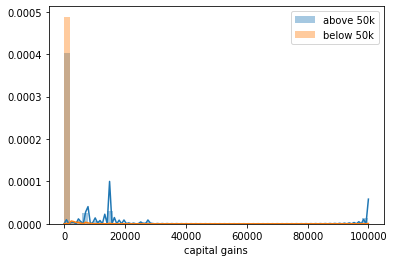

In [0]:
age50k = df[(df['total person income']==1)]['capital gains']  #plotting with respect to target variable.
agel50k = df[(df['total person income']==0)]['capital gains']

sns.distplot(age50k,label='above 50k')
sns.distplot(agel50k,label='below 50k')
plt.legend()
plt.show()


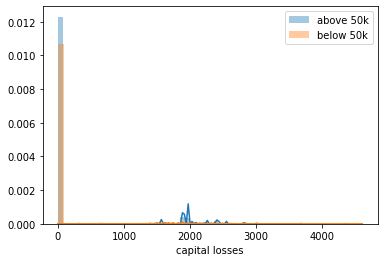

In [0]:
age50k = df[(df['total person income']==1)]['capital losses']
agel50k = df[(df['total person income']==0)]['capital losses']

sns.distplot(age50k,label='above 50k')
sns.distplot(agel50k,label='below 50k')
plt.legend()
plt.show()

Basic observation: People having income above 50k seem to have more capital gains or losses, it shows us a trend that this category tend to invest more.

Observation: After doing basic distribution on capital gains and losses, the data is highly discrete and there is a possibilty of outliers, hence we'll do feature engineering and combine capital gains with capital losses to make a new feature capital and check if that will give a better distribution and better variance in with respect to the target variable.

In [0]:
df['capital']=df_numeric['capital gains']-df_numeric['capital losses']

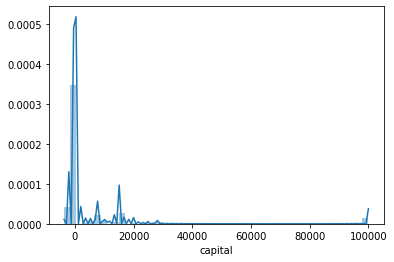

In [0]:
age50k = df[(df['total person income']==1)]['capital']
agel50k = df[(df['total person income']==0)]['capital']

sns.distplot(age50k)  #above 50k

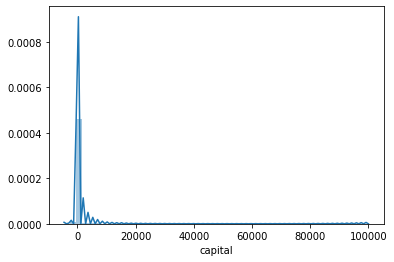

In [0]:
sns.distplot(agel50k) #below 50k

We can apply transformation on numeric data or even try to remove outliers but for now we can see from visualisation that  above 50k people have higher capital margins compared to less than 50k.

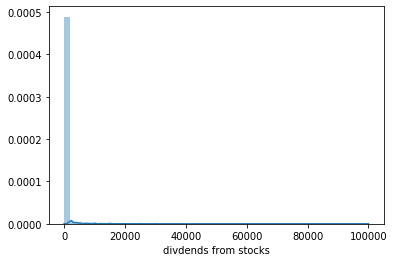

In [0]:
sns.distplot(df['divdends from stocks'])

Dividends from stock is highly right skewed data which suggests very low amount of people investing in stock markets.

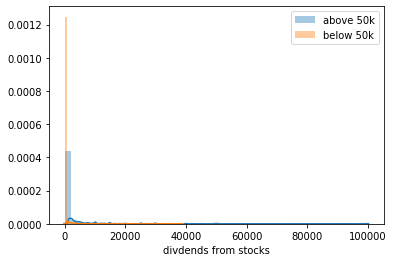

In [0]:
age50k = df[(df['total person income']==1)]['divdends from stocks']
agel50k = df[(df['total person income']==0)]['divdends from stocks']

sns.distplot(age50k,label='above 50k')
sns.distplot(agel50k,label='below 50k')
plt.legend()
plt.show()

It's very hard to visualise because distribution is accumulated at 0 dividends. Lets remove some initial dividends and increase the level of detail(granularity) of the graph.

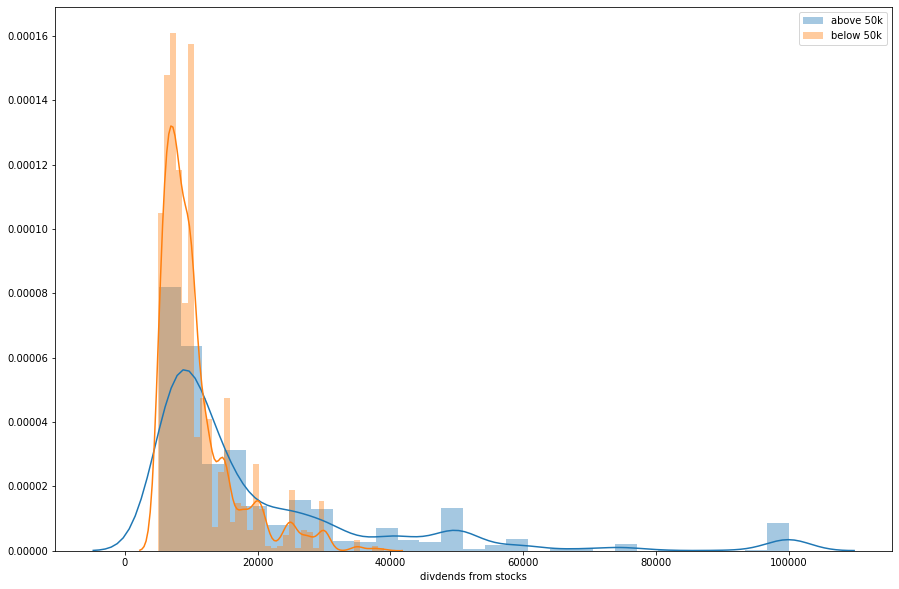

In [0]:
age50k = df[(df['total person income']==1) & (df['divdends from stocks']>5000)]['divdends from stocks']
agel50k = df[(df['total person income']==0) & (df['divdends from stocks']>5000)]['divdends from stocks']
plt.figure(figsize=(15,10))
sns.distplot(age50k,label='above 50k')
sns.distplot(agel50k,label='below 50k')
plt.legend()
plt.show()


People with above 50k salary have more dividend gains and vice-versa. As it is a binary classification problem the outlier shouldnt be a problem but for safer side, the numeric data will be transformed because of high overall skewness.

marital status


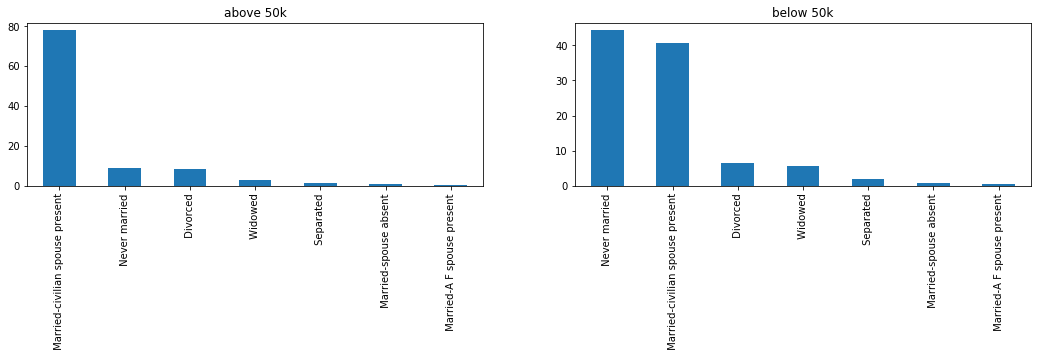

race


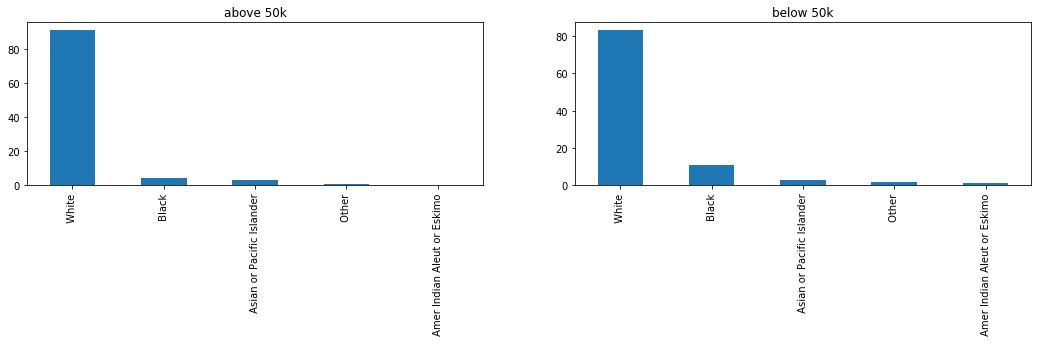

sex


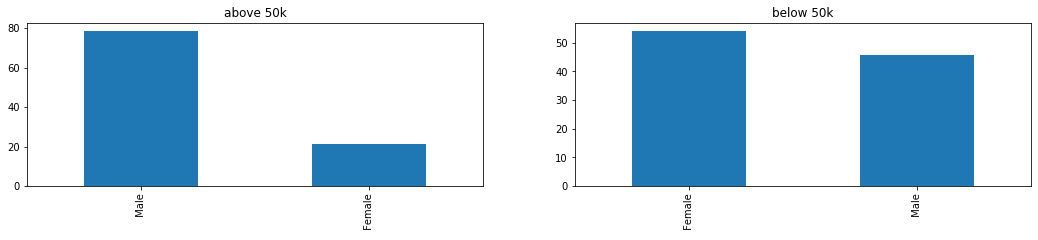

hispanic Origin


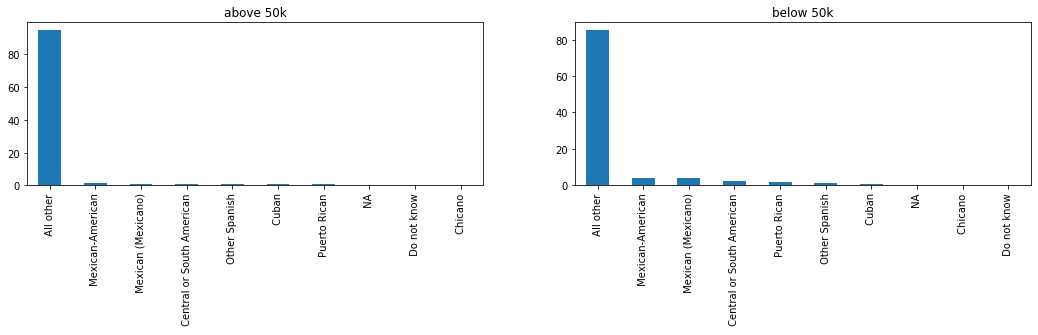

detailed household and family stat


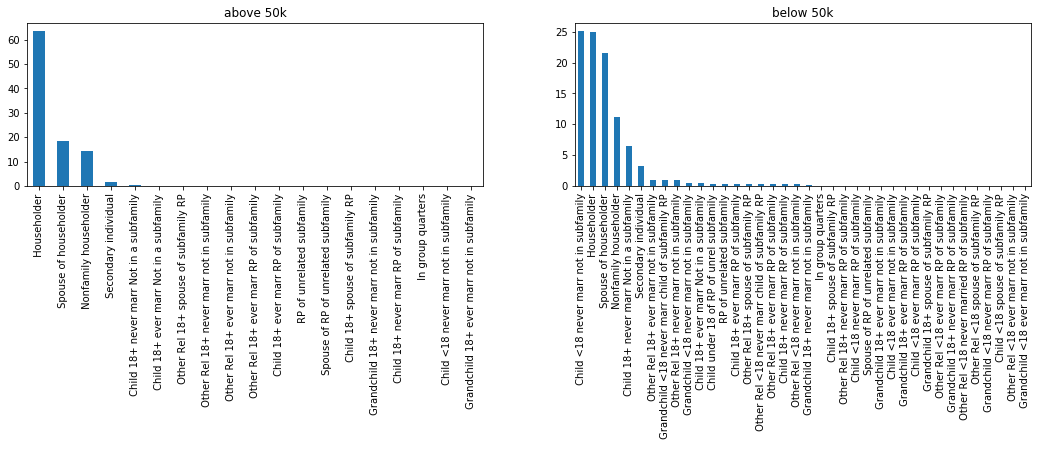

detailed household summary in household


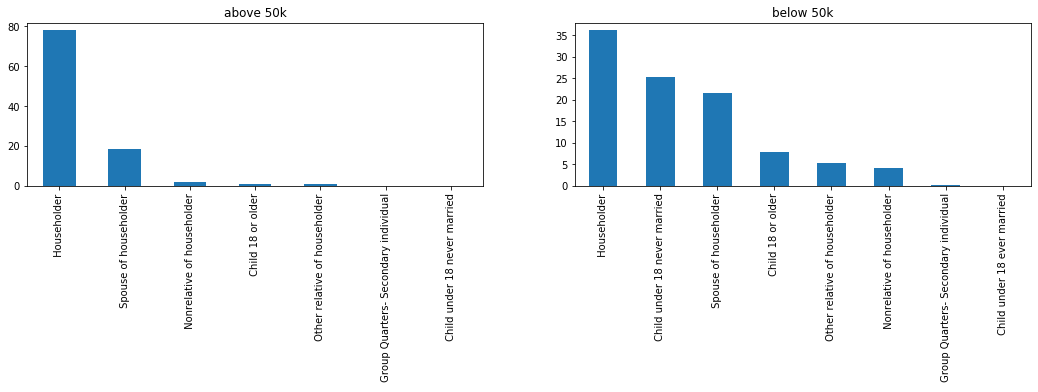

total person income


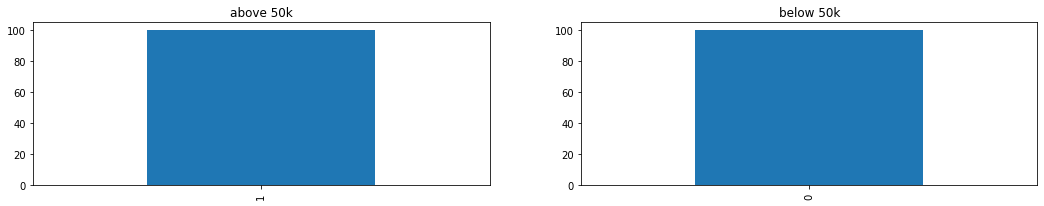

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']==1]
df_categorical_below50k = df_categorical[df_categorical['total person income']== 0]
for i in df_categorical.columns:
    print(i)
    fig,axis = plt.subplots(1,2, figsize = (18,3))
    (df_categorical_above50k[i].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
    (df_categorical_below50k[i].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
    axis[0].set_title('above 50k')
    axis[1].set_title('below 50k')
    plt.show()

__Observations from categorical plots:__
1. __Marital Status:__ There are 7 categories in marital status, we can see clear distinguishing factors between our target classes. Instances having more that 50k income belong more to a married category and vice-versa. These 7 categories can be bucketed down to 2 categories namely: married and single.
2. __Race:__ *White* is the majority class in both classes but if we bucket the minorities and create overall 3 categories namely: *White,Black,Minorities* will help in classification prediction.
3. __Sex:__ Two categories male and female. More percentage of males in above 50k and more females in less than 50k. Definitely an important feature.
4. __Hispanic origin:__ Repective classes have low amount of information because of heavy imbalance by *All other* category. Even bucketing will result in similar results. Hence hispanic origin can be taken as low importance feature. We'll confirm this statistically using chi square test later.
5. __'detailed household and family stat' and 'detailed household summary in household'__ provide the same data. It depicts the role of instance in the family. One feature seems to be derived from another feature by combining similar categories hence *detailed household and family stat* will be dropped and *detailed household summary* will be kept and further category clubbing will be tried if similar categories found.

Thus we can say that, *'Marital Status','Sex','detailed household summary'* are the important features which we need to cosider for classification. *Race* is of medium importance the rest features can be dropped.

In [0]:
df_categorical['marital status'].unique()

array([' Widowed', ' Divorced', ' Never married',
       ' Married-civilian spouse present', ' Separated',
       ' Married-spouse absent', ' Married-A F spouse present'],
      dtype=object)

In [0]:
df_categorical['marital status'][(df_categorical['marital status'] == ' Widowed')
                                     |(df_categorical['marital status'] == ' Divorced')
                                     |(df_categorical['marital status'] == ' Never married')
                                     |(df_categorical['marital status'] == ' Separated')] = 'Single'
df_categorical['marital status'][df_categorical['marital status']!='Single']='Married'

In [0]:
df_categorical['marital status'].unique()

array(['Single', 'Married'], dtype=object)

Text(0.5, 1.0, 'below 50k')

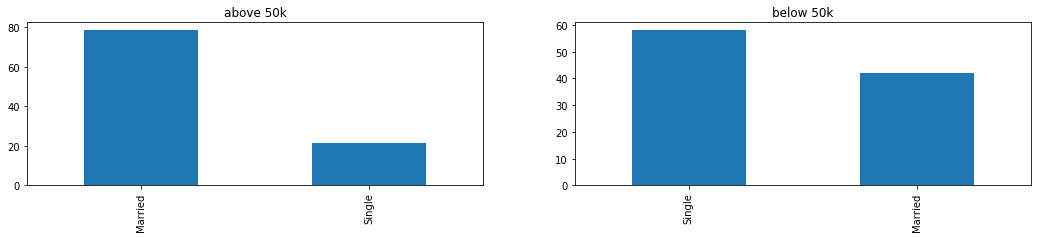

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']==1]
df_categorical_below50k = df_categorical[df_categorical['total person income']== 0]
fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['marital status'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['marital status'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')

In [0]:
df_categorical['race'].unique()

array([' White', ' Asian or Pacific Islander',
       ' Amer Indian Aleut or Eskimo', ' Black', ' Other'], dtype=object)

In [0]:
df_categorical['race'][(df_categorical['race']!=' White') & (df_categorical['race']!=' Black')]='Minority'

Text(0.5, 1.0, 'below 50k')

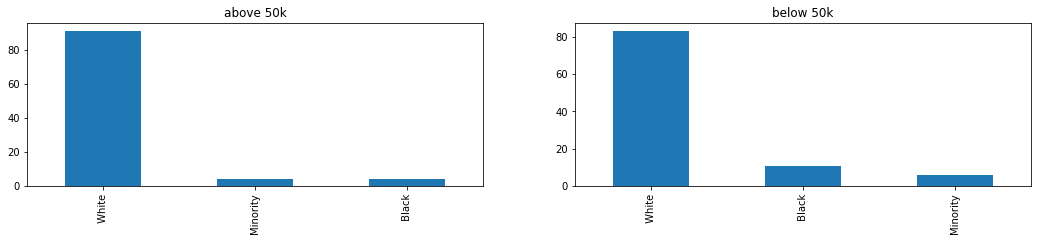

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']==1]
df_categorical_below50k = df_categorical[df_categorical['total person income']== 0]
fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['race'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['race'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')

Observation: Even after Bucketing there's no significant improvement.

__This is the final selected variables:__
- capital
- divdends from stocks
- marital status
- race
- sex
- detailed household summary in household

In [0]:
final_df = pd.concat([final_df,df[['capital','divdends from stocks']]],axis=1)
final_df = pd.concat([final_df,df_categorical[['marital status','race','sex','detailed household summary in household']]],axis=1)

#### Let's perform EDA and then if required bucketing of the following columns:
-  'Weeks Worked in year'
- 'YEAR'
- 'Age'
- 'migration code-change in msa'
- 'migration code-change in reg'
- 'migration code-move within reg'
- 'live in this house 1 year ago'
- 'migration prev res in sunbelt' 

In [0]:
# consider following dataframe:
df=census[['weeks worked in year', 'YEAR', 'age', 'migration code-change in msa', 'migration code-change in reg', 'live in this house 1 year ago', 'migration prev res in sunbelt', 'migration code-move within reg','total person income']]
df.head()

,weeks worked in year,YEAR,age,migration code-change in msa,migration code-change in reg,live in this house 1 year ago,migration prev res in sunbelt,migration code-move within reg,total person income
0,0,95,73,?,?,Not in universe under 1 year old,?,?,-50000
1,52,94,58,MSA to MSA,Same county,No,Yes,Same county,-50000
2,0,95,18,?,?,Not in universe under 1 year old,?,?,-50000
3,0,94,9,Nonmover,Nonmover,Yes,Not in universe,Nonmover,-50000
4,0,94,10,Nonmover,Nonmover,Yes,Not in universe,Nonmover,-50000


In [0]:
df_numeric = df._get_numeric_data()
df_categorical = df.select_dtypes(include='object')
df_numeric = pd.concat([df_numeric,df['total person income']],axis=1)

In [0]:
df_numeric.columns

Index(['weeks worked in year', 'YEAR', 'age', 'total person income'], dtype='object')

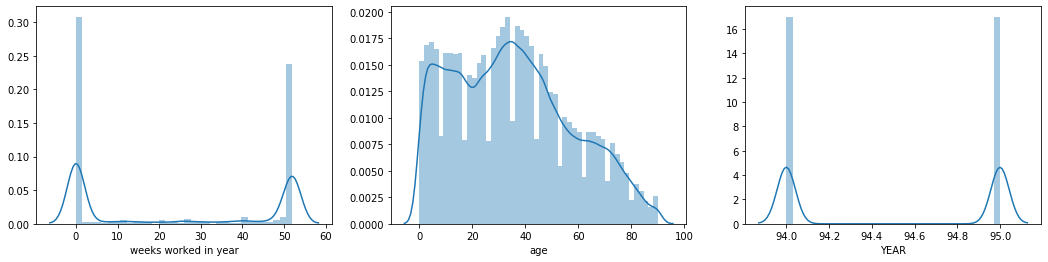

In [0]:
fig, axis = plt.subplots(1,3, figsize = (18,4))
sns.distplot(df_numeric['weeks worked in year'], kde=True, ax=axis[0])
sns.distplot(df_numeric['age'], kde=True, ax=axis[1])
sns.distplot(df_numeric['YEAR'], kde=True, ax=axis[2])
plt.show()

#### weeks worked in year

In [0]:
df_numeric['weeks worked in year'].value_counts(normalize=True).head()

0     0.468877
52    0.360116
40    0.014192
50    0.011660
26    0.011598
Name: weeks worked in year, dtype: float64

In [0]:
df_numeric['weeks worked in year'].value_counts().shape

(53,)

- In data weeks worked in year is a numerical feacture but there is repeatation of all value many times as there are only 53 unique entries in this feacture so we can convert weeks worked in year in categorical feactures
- in the data 46.88 % of peopel worked for 0 weeks 
- and almost 36% of people work for 52 weeks in year

__bucketing weeks worked in year column with respect to part time and full time jobs as per documentation provided on uci__

In [0]:
df_numeric['weeks worked in year'] = census['weeks worked in year']

df_numeric['weeks worked in year'][(df_numeric['weeks worked in year'] == 0)] = 0
df_numeric['weeks worked in year'][(df_numeric['weeks worked in year'] >= 1) & (df_numeric['weeks worked in year'] < 50)] = 1
df_numeric['weeks worked in year'][(df_numeric['weeks worked in year'] >= 50)]= 2

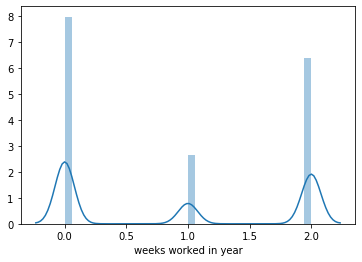

In [0]:
sns.distplot(df_numeric['weeks worked in year'])
plt.show()

- the person who worked for 0 weeks in year we keep them as one category because we can say that they are student,childerens or who have never worked
- the person who work for less than 50 weeks per year are considered as part time workers belongs to category 1
- the person who work for more than 50 weeks per yarn are considered as full time workers belongs to category 2

__distributation of week worked in year with respect to total persons income__

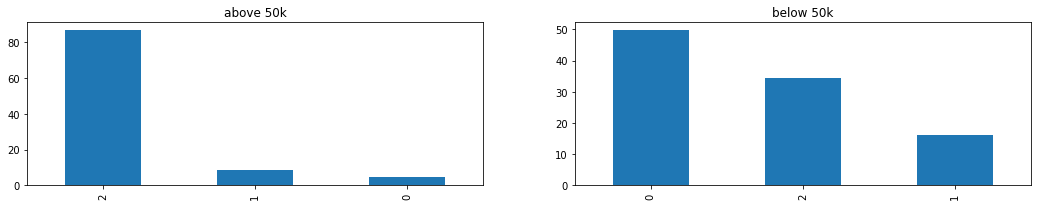

In [0]:
df_numeric_above50k = df_numeric[df_numeric['total person income']== ' 50000+.']
df_numeric_below50k = df_numeric[df_numeric['total person income']== '-50000']

fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_numeric_above50k['weeks worked in year'].value_counts() / df_numeric_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_numeric_below50k['weeks worked in year'].value_counts() / df_numeric_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')
plt.show()

-  we can see that the majority of people who workers 0 weeks in year have salary below 50k   
-  we can see that the people who work for more than 50 weeks in year have salary above 50k

#### migration code-change in msa

In [0]:
df['migration code-change in msa'].value_counts()

 ?                   146141
 Nonmover            121017
 MSA to MSA           15815
 NonMSA to nonMSA      4136
 Not in universe       2026
 MSA to nonMSA         1150
 NonMSA to MSA          908
 Not identifiable       630
 Abroad to MSA          618
 Abroad to nonMSA       109
Name: migration code-change in msa, dtype: int64

In [0]:
df['migration code-change in msa'].value_counts(normalize=True) * 100

 ?                   49.954196
 Nonmover            41.366262
 MSA to MSA           5.405914
 NonMSA to nonMSA     1.413775
 Not in universe      0.692531
 MSA to nonMSA        0.393095
 NonMSA to MSA        0.310374
 Not identifiable     0.215348
 Abroad to MSA        0.211246
 Abroad to nonMSA     0.037259
Name: migration code-change in msa, dtype: float64

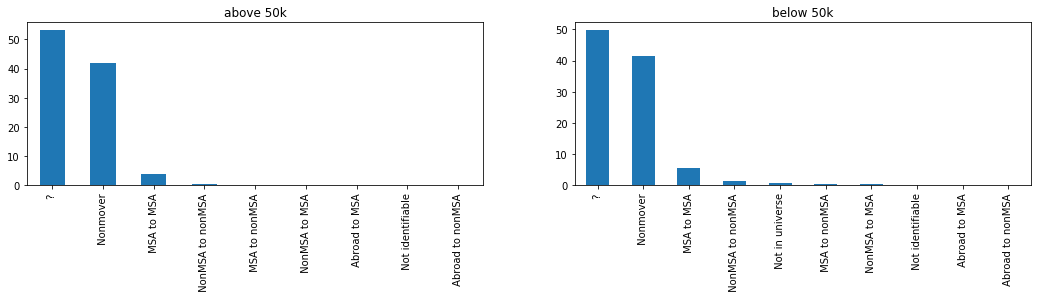

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']== ' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']

fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['migration code-change in msa'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['migration code-change in msa'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')
plt.show()

- in migration code-change in msa almost 49.96% of data is '?' which is missing data 
- we also try to corelate this feature with other related features present in data such as migration code-change in msa,migration code-change in reg,migration prev res in sunbelt,migration code-move within reg but fails to corelate it therefore it is better if we drop this feature

#### migration code-move within reg'

In [0]:
df['migration code-move within reg'].value_counts()

 ?                               146141
 Nonmover                        121017
 Same county                      14612
 Different county same state       4113
 Not in universe                   2026
 Different state in South          1446
 Different state in West           1035
 Different state in Midwest         792
 Abroad                             732
 Different state in Northeast       636
Name: migration code-move within reg, dtype: int64

In [0]:
df['migration code-move within reg'].value_counts(normalize=True) * 100

 ?                               49.954196
 Nonmover                        41.366262
 Same county                      4.994702
 Different county same state      1.405914
 Not in universe                  0.692531
 Different state in South         0.494274
 Different state in West          0.353786
 Different state in Midwest       0.270723
 Abroad                           0.250214
 Different state in Northeast     0.217399
Name: migration code-move within reg, dtype: float64

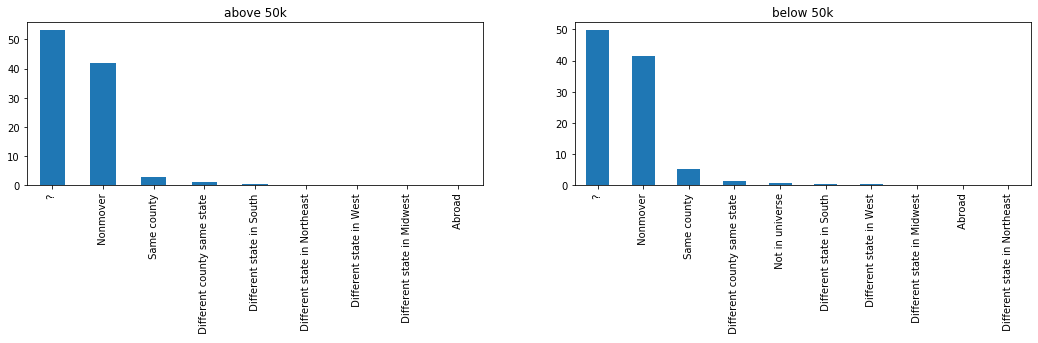

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']== ' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']

fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['migration code-move within reg'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['migration code-move within reg'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')
plt.show()

- in migration code-change within reg almost 49.96% of data is '?' which is missing data 
- we also try to corelate this feature with other related features present in data such as migration code-change in msa,migration code-change in reg,migration prev res in sunbelt but fails to corelate it therefore it is better if we drop this feature

#### age

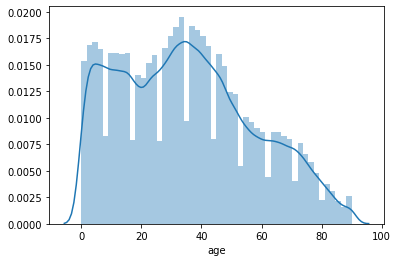

In [0]:
sns.distplot(df_numeric['age'])
plt.show()

In [0]:
df_numeric['age'].value_counts().head()

34    5206
35    5119
33    5090
31    4954
37    4924
Name: age, dtype: int64

In [0]:
df_numeric['age'].value_counts().shape

(91,)

- In data age is a numerical feacture but there is repeatation of all value many times as there are only 91 unique entries in the feacture so we can convert age in categorical feactures
- in the data 5206 people have age 34 year
- the final call wheather to convert the age feature into catogerical feacture or not  will be taken  after checking it staticially and its effect on performance of model when it is categorical and when it is continous.

__bucketing age column with respect to experience:__

In [0]:
df_numeric['age'][df_numeric['age'] <= 15] = 1
df_numeric['age'][(df_numeric['age'] > 15) & (df['age'] <= 19)] = 2
df_numeric['age'][(df_numeric['age'] > 19) & (df['age'] <= 35)] = 3
df_numeric['age'][(df_numeric['age'] > 35) & (df['age'] <= 55)] = 4
df_numeric['age'][(df_numeric['age'] > 55) & (df['age'] <= 65)] = 5
df_numeric['age'][(df_numeric['age'] > 65)] = 6

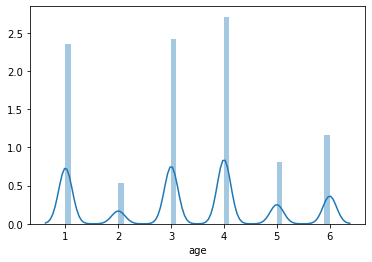

In [0]:
sns.distplot(df_numeric['age'])
plt.show()

- Converting continous feature age to categorical column
-  the entries having age below 15 belongs to category 1 in this category there are chidrens 
-  the entries having age between 15 to 19 belongs to category 2 which consis of childrens worked in armed forces
-  the entries having age between 19 to 35 belongs to category 3 which consist of entry level working experience 
-  the entries having age between 35 to 55 belongs to category 4 which consist of experienced working class people 
- the entries having age between 55 to 65 belongs to category 5 which consist of highly experienced working class people 
-  the entries having age above 65 belongs to category 6 which consist entries of retired and individual having their owm business 

In [0]:
df_numeric['age'].value_counts(normalize=True) * 100

4    27.104085
3    24.248505
1    23.491369
6    11.687233
5     8.079986
2     5.388822
Name: age, dtype: float64

__distributation of age with respect to total persons income__

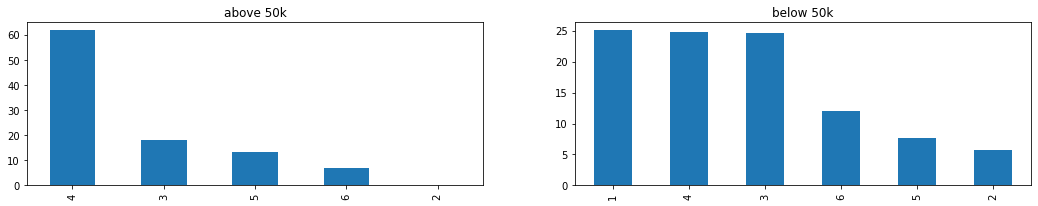

In [0]:
df_numeric_above50k = df_numeric[df_numeric['total person income']== ' 50000+.']
df_numeric_below50k = df_numeric[df_numeric['total person income']== '-50000']

fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_numeric_above50k['age'].value_counts() / df_numeric_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_numeric_below50k['age'].value_counts() / df_numeric_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')
plt.show()

-  we can see that the majority of people having age range between 0 to 19 have salary below 50k as most probably they are students    
-  most of the people having age between 35 to 65 have salary above 50k 
- the number of people earning above 50k and below 50k is almost same for people having age above 65. In that the people who are earning above 50k mostly have there own business and people who are earning below 50k are retired onces.

#### migration code-change in reg

In [0]:
df_categorical['migration code-change in reg'].value_counts()

 ?                                 146141
 Nonmover                          121017
 Same county                        14612
 Different county same state         4113
 Not in universe                     2026
 Different region                    1760
 Different state same division       1461
 Abroad                               732
 Different division same region       688
Name: migration code-change in reg, dtype: int64

In [0]:
df_categorical['migration code-change in reg'].value_counts(normalize=True) * 100

 ?                                 49.954196
 Nonmover                          41.366262
 Same county                        4.994702
 Different county same state        1.405914
 Not in universe                    0.692531
 Different region                   0.601607
 Different state same division      0.499402
 Abroad                             0.250214
 Different division same region     0.235173
Name: migration code-change in reg, dtype: float64

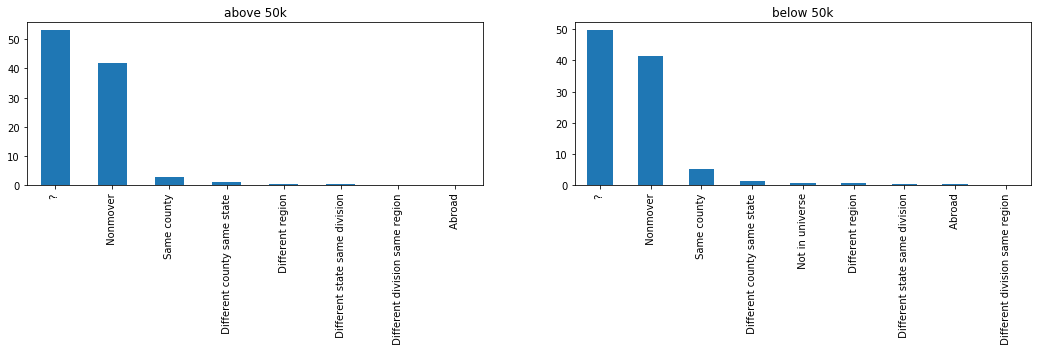

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']== ' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']

fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['migration code-change in reg'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['migration code-change in reg'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')
plt.show()

- in migration code-change in reg almost 49.96% of data is '?' which is missing data 
- we also try to corelate this feature with other related features present in data such as migration code-change in msa,migration prev res in sunbelt,migration code-move within reg but fails to corelate it therefore it is better if we drop this feature

#### migration prev res in sunbelt

In [0]:
df_categorical['migration prev res in sunbelt'].value_counts()

 ?                  146141
 Not in universe    123043
 No                  14733
 Yes                  8633
Name: migration prev res in sunbelt, dtype: int64

In [0]:
df_categorical['migration prev res in sunbelt'].value_counts(normalize=True) * 100

 ?                  49.954196
 Not in universe    42.058793
 No                  5.036062
 Yes                 2.950949
Name: migration prev res in sunbelt, dtype: float64

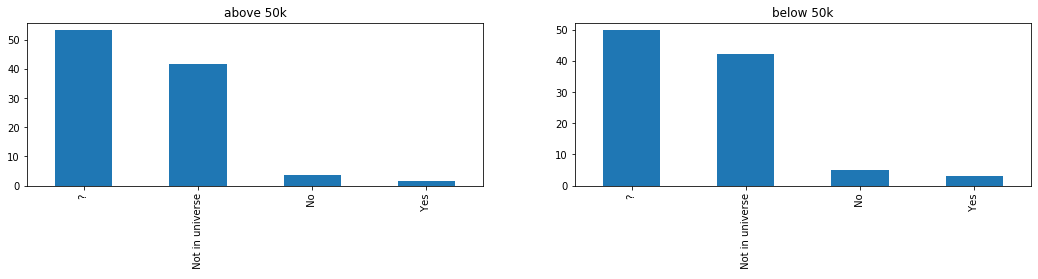

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']== ' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']

fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['migration prev res in sunbelt'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['migration prev res in sunbelt'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')
plt.show()

- In migration prev res in sunbelt almost 49.96% of data is '?' which is missing data 
- In migration prev res in sunbelt almost 42.06% of data is 'Not in universe' which is missing data  
- that is in migration prev res in sunbelt features almost 92% of data is unknown we also try to corelate this feature with other related features present in data such as migration code-change in msa,migration code-move within reg but fails to corelate it therefore it is better if we drop this feature

#### live in this house 1 year ago

In [0]:
df_categorical['live in this house 1 year ago'].value_counts()

 Not in universe under 1 year old    148167
 Yes                                 121017
 No                                   23366
Name: live in this house 1 year ago, dtype: int64

In [0]:
df_categorical['live in this house 1 year ago'].value_counts(normalize=True)

 Not in universe under 1 year old    0.506467
 Yes                                 0.413663
 No                                  0.079870
Name: live in this house 1 year ago, dtype: float64

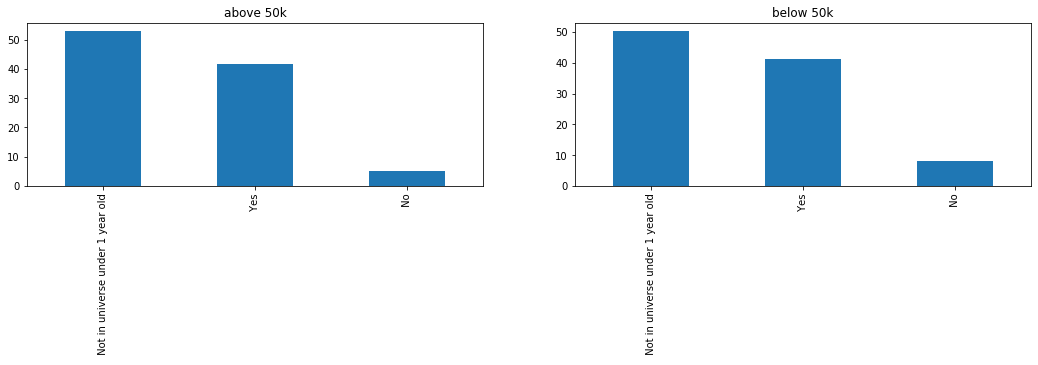

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']== ' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']

fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['live in this house 1 year ago'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['live in this house 1 year ago'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')
plt.show()

- In feature live in this house 1 year ago almost 50% data is represented by not in universe under 1 year old, this is missing data therefore it is better to drop this feature.

#### year

In [0]:
df['YEAR'].value_counts()

94    146409
95    146141
Name: YEAR, dtype: int64

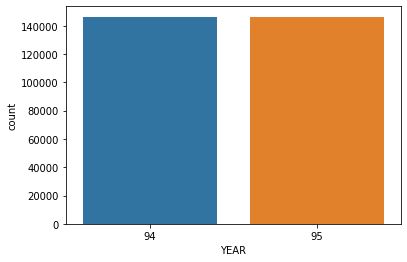

In [0]:
sns.countplot(df['YEAR'])
plt.show()

We can drop this column.

__This is the final selected variables:__
- weeks worked in year
- age

In [0]:
final_df = pd.concat([final_df,df_numeric[['age','weeks worked in year']]],axis=1)

#### Let's perform EDA and then if required bucketing of the following columns:
- 'education'
- 'enrolled in edu inst last wk'
- 'reason for unemployment'
- 'full or part time employment stat'
- 'tax filer status'
- 'own business or self employed '
- 'veterans benefits'
- 'total person income'
- "fill inc questionnaire for veteran's admin"

In [0]:
## making separate dataframe for this features 

df1=census[['education', 'enrolled in edu inst last wk','reason for unemployment',
                   'full or part time employment stat','tax filer status','own business or self employed ','veterans benefits','total person income'
                  ,"fill inc questionnaire for veteran's admin"]]
df1.head()

,education,enrolled in edu inst last wk,reason for unemployment,full or part time employment stat,tax filer status,own business or self employed,veterans benefits,total person income,fill inc questionnaire for veteran's admin
0,High school graduate,Not in universe,Not in universe,Not in labor force,Nonfiler,0,2,-50000,Not in universe
1,Some college but no degree,Not in universe,Not in universe,Children or Armed Forces,Head of household,0,2,-50000,Not in universe
2,10th grade,High school,Not in universe,Not in labor force,Nonfiler,0,2,-50000,Not in universe
3,Children,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,0,0,-50000,Not in universe
4,Children,Not in universe,Not in universe,Children or Armed Forces,Nonfiler,0,0,-50000,Not in universe


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292550 entries, 0 to 292549
Data columns (total 9 columns):
education                                     292550 non-null object
enrolled in edu inst last wk                  292550 non-null object
reason for unemployment                       292550 non-null object
full or part time employment stat             292550 non-null object
tax filer status                              292550 non-null object
own business or self employed                 292550 non-null int64
veterans benefits                             292550 non-null int64
total person income                           292550 non-null object
fill inc questionnaire for veteran's admin    292550 non-null object
dtypes: int64(2), object(7)
memory usage: 20.1+ MB


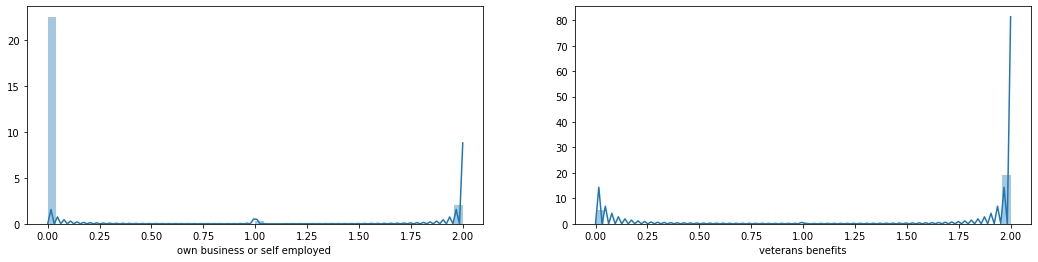

In [0]:
fig, axis = plt.subplots(1,2, figsize = (18,4))
sns.distplot(df1['own business or self employed '], kde=True, ax=axis[0])
sns.distplot(df1['veterans benefits'], kde=True, ax=axis[1])
plt.show()

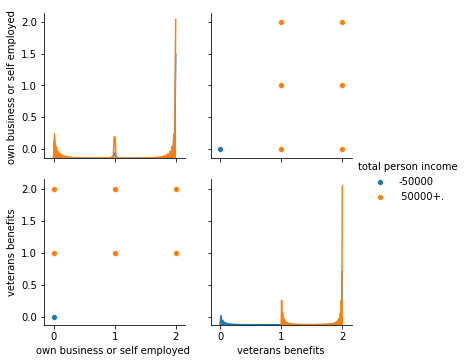

In [0]:
sns.pairplot(data=df1, hue='total person income', diag_kind='kde')
plt.show()

education


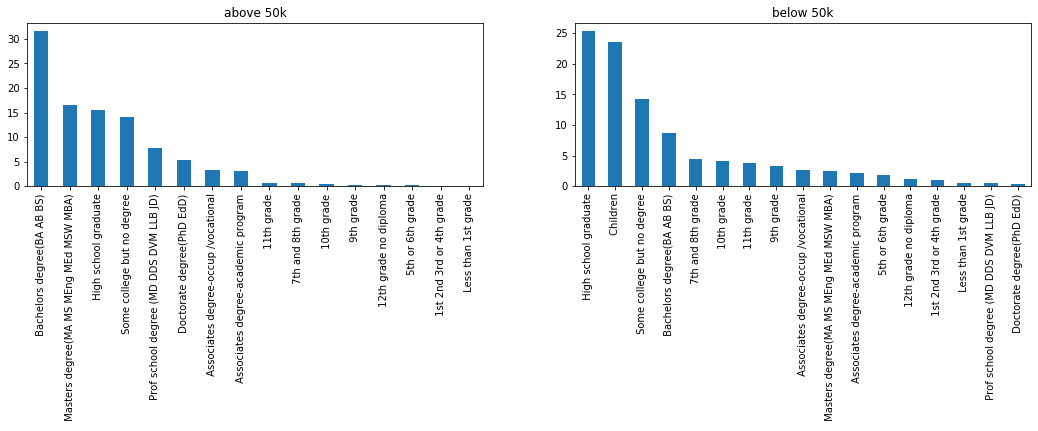

enrolled in edu inst last wk


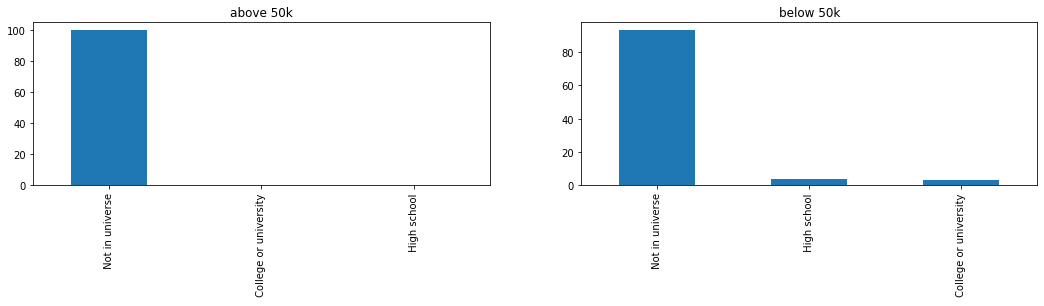

reason for unemployment


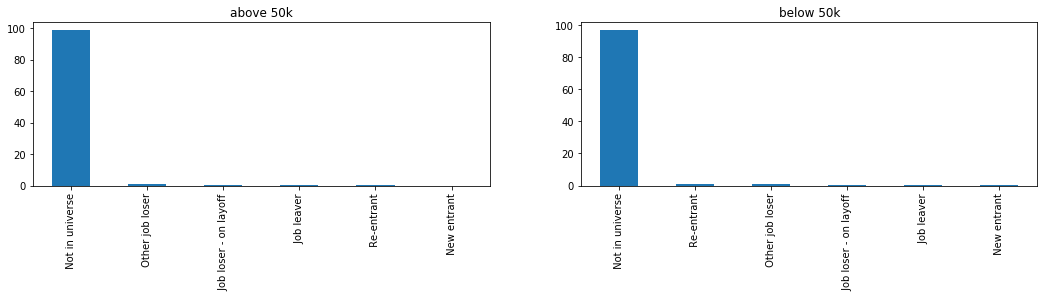

full or part time employment stat


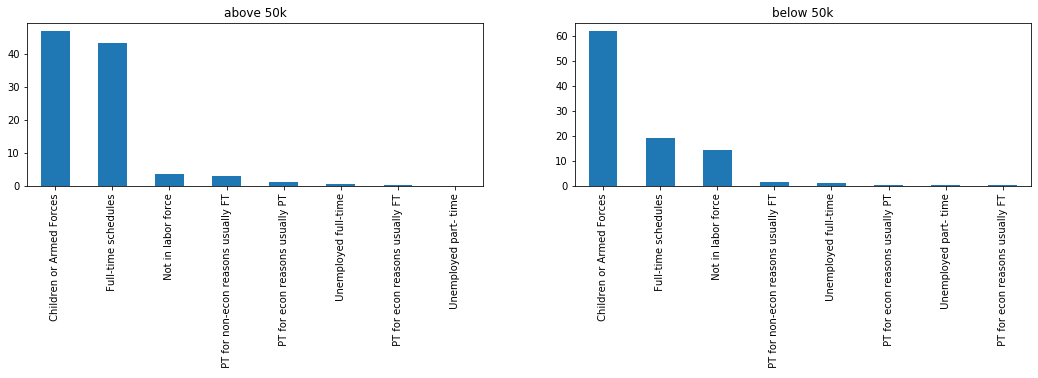

tax filer status


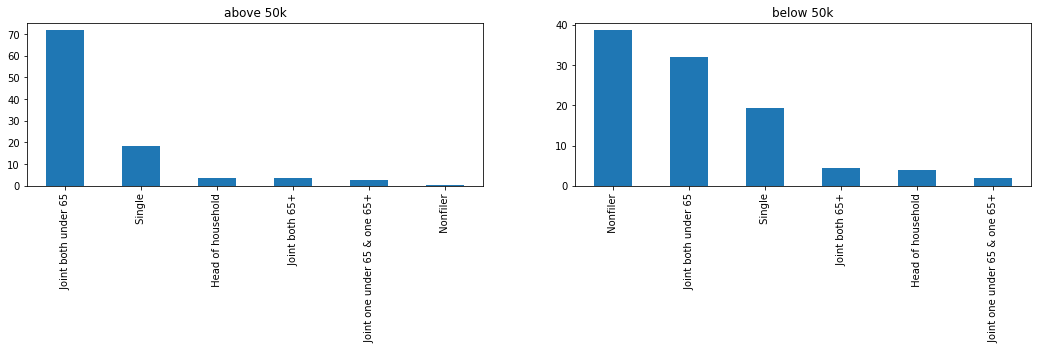

own business or self employed 


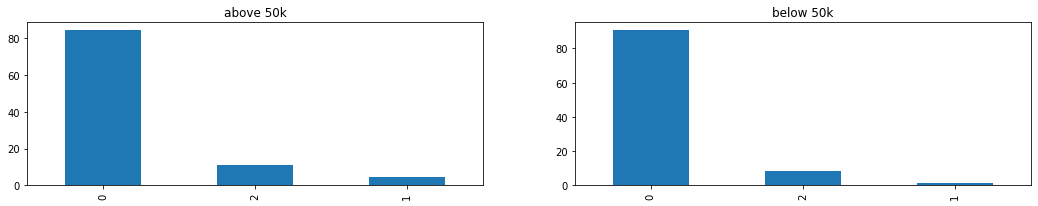

veterans benefits


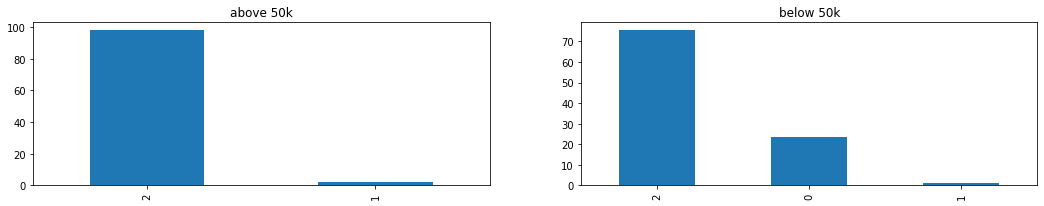

total person income


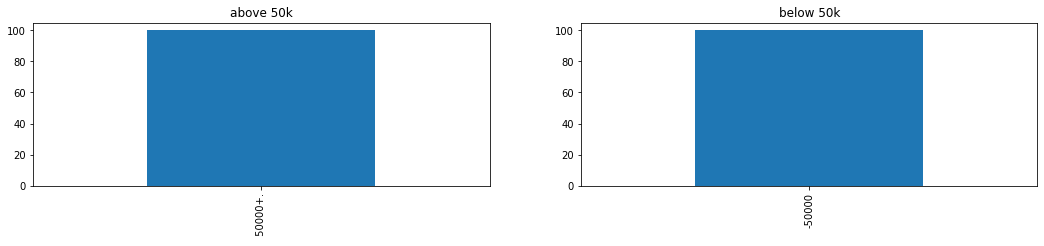

fill inc questionnaire for veteran's admin


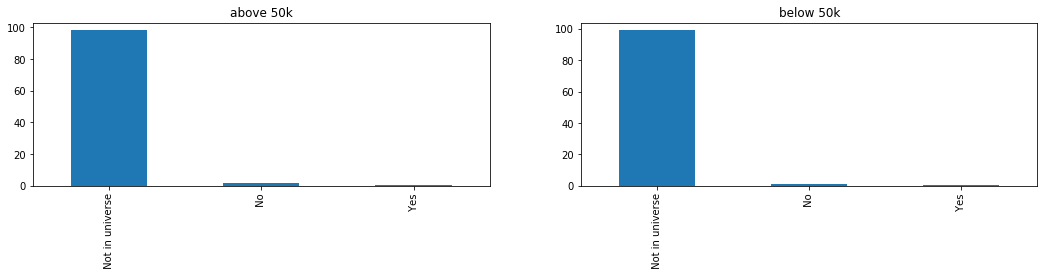

In [0]:
df_above50k = df1[df1['total person income']== ' 50000+.']
df_below50k = df1[df1['total person income']== '-50000']
for i in df1.columns:
    print(i)
    fig,axis = plt.subplots(1,2, figsize = (18,3))
    (df_above50k[i].value_counts() / df_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
    (df_below50k[i].value_counts() / df_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
    axis[0].set_title('above 50k')
    axis[1].set_title('below 50k')
    plt.show()

## From the above chart 
- we need to do bucketing for education for better understanding
## Enrolled in edu inst last wk
#### Above 50K
- almost 100% data is not in universe, from this we cant infer anything.
#### Below 50K
- almost 93% data is not in universe, from this we cant infer anything.

## Tax filer status
#### Above 50K
- 71% people filed tax return for joint both under 65 (A married couple can file a joint return or separate returns.
 - You’re legally married or 
 - You’re not legally separated under a divorce or separate maintenance decree.) followed by
- 18% people filed tax return for single ( singles are :
  - You’re unmarried or legally separated from your spouse under a divorce or separate maintenance decree.
  - You don’t qualify to file as head of household or qualifying widow(er).)
- 3% peoples are filed tax return for head of household and joint both 65+

#### Below 50K
- almost 40% people are non filers 
- 31% of people files tax return for joint both under 65
- almost 20% people files for singles
- 4% peole for joint both 65+
- 3% people for head of household


## Veterans benefits
#### Above 50K
- almost 99% people have 2 (no) veteran benefits gets above 50K followed by
- 1% people have 1(yes) veteran benefits
- no 0  veteran benefits
#### Below 50K
- almost 73% people are having 2(no) veteran benefits gets below 50k followed by 
- almost 25% people are not having veteran benefits but earns  below 50K
- 1% people are having 1 (yes) veteran benefits.

## Full or part time employment stat
#### Above 50K
- from this we can just say children or armed forces earns more income , we are not having any relavant feature so that we can conclude how they are earning income.
- people who are working for full time schedule earns are almost 40% 
#### Below 50K
- from this we can just say children or armed forces earns more income , we are not having any relavant feature so that we can conclude how they are earning income.

## Own Business or self employed

- there is no relationship with the total pereson income because the data is not relavant.
- we can check with other features to find any relationship 

## Reason for unemployment
#### Above 50K
- almost 98% data is not in universe, from this we cant infer anything.
#### Below 50K
- almost 96% data is not in universe, from this we cant infer anything.

## for this sutitation we have to do feature engineering , by doing we can get some new features. with proper relation

### Feature Engineering for _`Reason for Unemployment`_ (collected data from other features  which have relation with each unique features)

In [0]:
y= census[['reason for unemployment','age','own business or self employed ', 'major occupation code', 'veterans benefits' ,'class of worker','capital gains','divdends from stocks','total person income']]
#[(x['reason for unemployment'] == ' Not in universe') & (x['own business or self employed '] == 1) & (x['age'] <= 15)]
#x[(x['reason for unemployment'] == ' Not in universe') & (x['own business or self employed '] == 0) & (x['age'] == 15)]
#x


y['reason for unemployment'][(y['reason for unemployment'] != ' Not in universe') & (y['own business or self employed '] != 1) & (y['major occupation code'] == ' Not in universe')] = 'unemployed or Fresher'
y['reason for unemployment'][(y['reason for unemployment'] != ' Not in universe') & ((y['own business or self employed '] != 1) | (y['own business or self employed '] == 2)) & (y['major occupation code'] != ' Not in universe')] = 'recently unemployed'
y['reason for unemployment'][(y['reason for unemployment'] == ' Not in universe') & (y['own business or self employed '] == 1) & (y['age'] >= 15)] = 'own business'
y['reason for unemployment'][(y['reason for unemployment'] == ' Not in universe') & (y['own business or self employed '] != 1) & (y['age'] <= 15) & (y['major occupation code'] == ' Not in universe')]  = 'children'
y['reason for unemployment'][(y['reason for unemployment'] == ' Not in universe') & (y['own business or self employed '] != 1) & (y['major occupation code']!=' Not in universe') & (y['age']==15)] = 'employed'
y['reason for unemployment'][(y['reason for unemployment'] == ' Not in universe') & (y['major occupation code'] != ' Not in universe')] = 'employed'
y['reason for unemployment'][y['reason for unemployment']==' Other job loser'] = 'own business'
y['reason for unemployment'][y['reason for unemployment']==' Job leaver'] = 'own business'
y['reason for unemployment'][y['reason for unemployment']==' Re-entrant'] = 'own business'
y['reason for unemployment'][y['reason for unemployment']==' Job loser - on layoff'] = 'own business'


y['reason for unemployment'].unique()

array([' Not in universe', 'employed', 'children', 'recently unemployed',
       'own business', 'unemployed or Fresher'], dtype=object)

In [0]:
y['reason for unemployment'].value_counts(normalize=True) * 100

employed                 46.478551
 Not in universe         25.763801
children                 23.273970
recently unemployed       2.883951
own business              1.380277
unemployed or Fresher     0.219450
Name: reason for unemployment, dtype: float64

- *Unemployed or Fresher* = if he/she has reason for unemployment , does't have any business, and does't have any major occupation code then we can say that he/she is unemployed or fresher.
- *Recently Unemployed* = if he/she has reason for unemployment , does't have any business, and had a major occupation code then we can say that he/she is Recently Unemployed.
- *Own Business* = if he/she has no reason for unemployment , owns a business and there age is above 15 then we can say that he/she as own business.
- *Children* = if he/she has no reason for unemployment, does't have any business, if age is below 15, and does't have major occupation code then we say that he/she is a Children.
- *Employed* = if he/she has no reason for unemployment , does't have any business, comes under some major occupation code, and age is 15  and more then we can say he/she is employed

### Adding a new feature _`employment status`_ instead of `reason for unemployment` (we created using feature engineering using features like (reason for unemployment, owns businees or self employed, major occupation code, age), by doing this we got most of the data for which are missing)

In [0]:
df1['employment status']=y['reason for unemployment']

In [0]:
new_feature=df1.copy()

In [0]:
new_feature.drop('reason for unemployment',1,inplace=True)

In [0]:
new_feature.head()

,education,enrolled in edu inst last wk,full or part time employment stat,tax filer status,own business or self employed,veterans benefits,total person income,fill inc questionnaire for veteran's admin,employment status
0,High school graduate,Not in universe,Not in labor force,Nonfiler,0,2,-50000,Not in universe,Not in universe
1,Some college but no degree,Not in universe,Children or Armed Forces,Head of household,0,2,-50000,Not in universe,employed
2,10th grade,High school,Not in labor force,Nonfiler,0,2,-50000,Not in universe,Not in universe
3,Children,Not in universe,Children or Armed Forces,Nonfiler,0,0,-50000,Not in universe,children
4,Children,Not in universe,Children or Armed Forces,Nonfiler,0,0,-50000,Not in universe,children


## Features which not giving any significant relation with income we are removing 
- enrolled in edu inst last wk 
- fill inc questionnaire for veteran's admin
- for know we are removing these features , later we will check with feature selection methods

In [0]:
new_feature.drop(['enrolled in edu inst last wk',"fill inc questionnaire for veteran's admin"],1,inplace=True)

### bucketing education with logic

EDUCATION BUCKETING

0 - CHILDREN NON EDUCATORS
1- ELEMENTART SCCHOOL(1-8)
2- HIGH SCHOOL (9-12)
3- ug education()
4- pg
5- CERTIFICATES COURSE (ASSOCIATE DEGREE)


In [0]:

new_feature['education'][(new_feature['education']==' Children')]=0 # children or non educaters

new_feature['education'][(new_feature['education']==' Less than 1st grade')
                            |(new_feature['education']==' 1st 2nd 3rd or 4th grade')
                            |(new_feature['education']==' 5th or 6th grade')
                            |(new_feature['education']==' 7th and 8th grade')]=1 # elementary school

new_feature['education'][(new_feature['education']==' 9th grade')
                            |(new_feature['education']==' 10th grade')
                            |(new_feature['education']==' 11th grade')
                            |(new_feature['education']==' 12th grade no diploma')
                            |(new_feature['education']==' High school graduate')
                            |(new_feature['education']==' Some college but no degree')]=2 # high school 


new_feature['education'][(new_feature['education']==' Bachelors degree(BA AB BS)')]=3 # Under Graduate

new_feature['education'][(new_feature['education']==' Prof school degree (MD DDS DVM LLB JD)')
                 |(new_feature['education']==' Masters degree(MA MS MEng MEd MSW MBA)')
                 |(new_feature['education']==' Doctorate degree(PhD EdD)')] = 4 # Post Graduate

new_feature['education'][(new_feature['education']==' Associates degree-occup /vocational')
                 |(new_feature['education']==' Associates degree-academic program')]=5 # associate degrees

## Data Visaulization for all features with respect to income

education


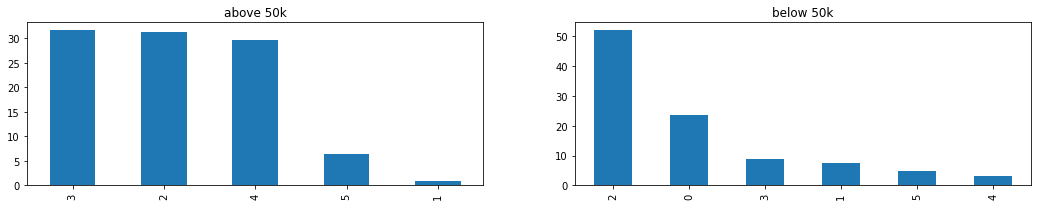

full or part time employment stat


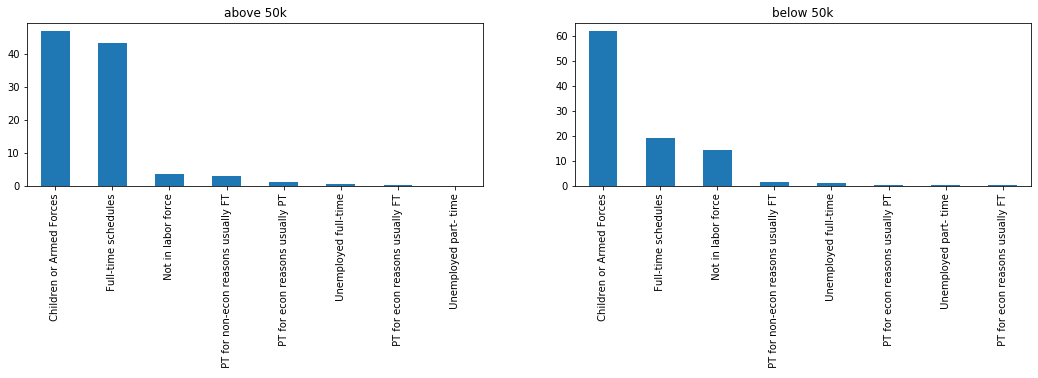

tax filer status


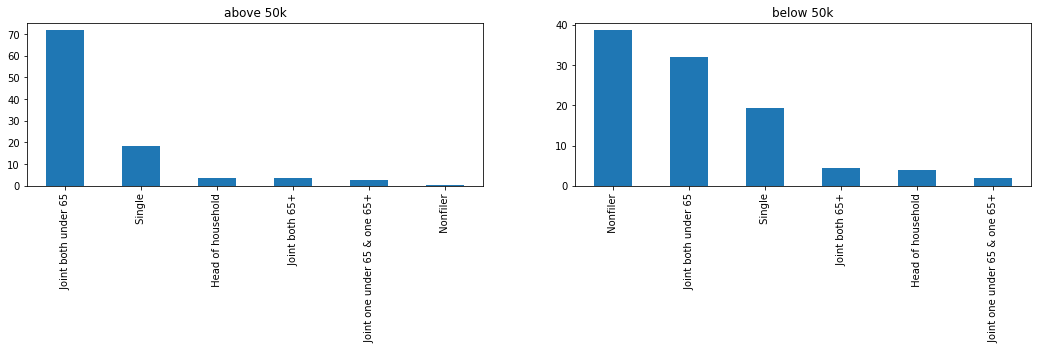

own business or self employed 


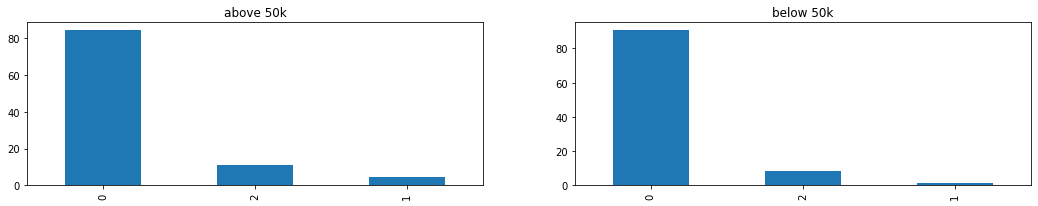

veterans benefits


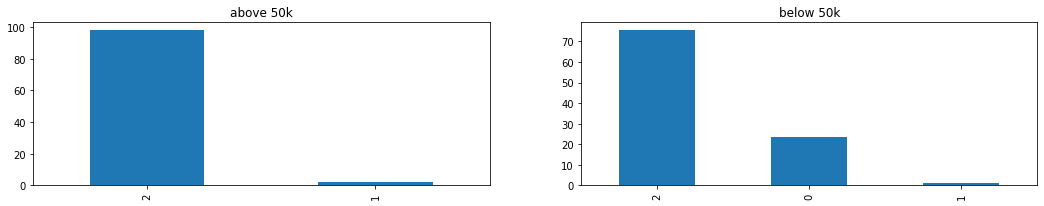

total person income


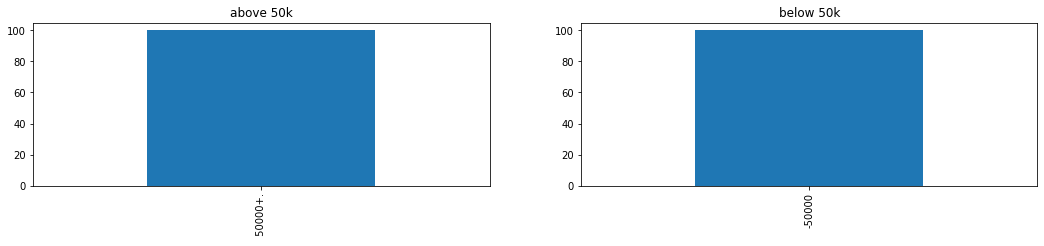

employment status


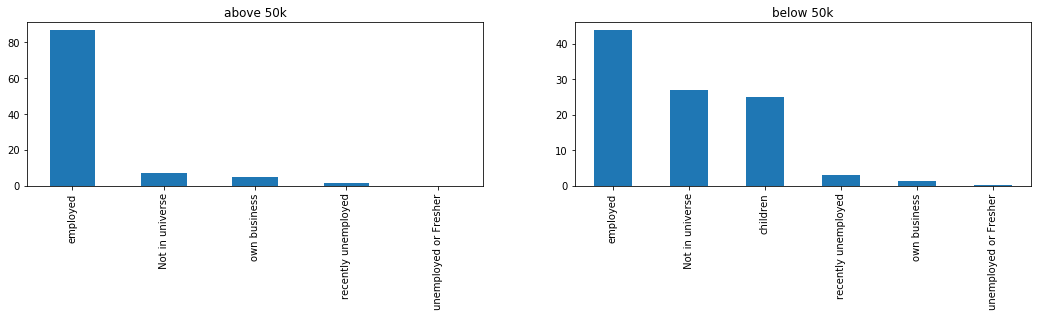

In [0]:
nf_above50k = new_feature[new_feature['total person income']== ' 50000+.']
nf_below50k = new_feature[new_feature['total person income']== '-50000']
for i in new_feature.columns:
    print(i)
    fig,axis = plt.subplots(1,2, figsize = (18,3))
    (nf_above50k[i].value_counts() / nf_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
    (nf_below50k[i].value_counts() / nf_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
    axis[0].set_title('above 50k')
    axis[1].set_title('below 50k')
    plt.show()

## From the above chart we can infer that how much people are earning w.r.t there education
- 0 - Children
- 1 - Elementary School (1-8 grade)
- 2 - High School (9-12 grade, high school graduation)
- 3 - Under-Graduate (Bachelors degree(BA AB BS))
- 4 - Post-Graduate (Prof. school degree, Masters degree, Doctorate)
- 5 - Associate degree (Associates degree-occup /vocational,academic program)

### Above 50K
- **31.6 %** people with **Under Graduate** earns more followed by 
- **31.3%** people with **High School**,
- **29.5%** people with **Post Graduate** and
- **6%** people with **Associate Degree** while
- **0.8%** people with atleast only **elementary school certificate** earns above 50k.
- no **Children** earns above 50K

### Below 50k
- **52%** people with **High School** earns more followed by
- **23.5%** people are **Children** (as per Federal law regulating child labor in the United States is the Fair Labor Standards Act. For non-agricultural jobs, children under 14 may not be employed, children between 14 and 16 may be employed in allowed occupations during limited hours, and children between 16 and 17 may be employed for unlimited hours in non-hazardous occupations. A number of exceptions to these rules exist, such as for employment by parents, newspaper delivery, and child actors. The regulations for agricultural employment are generally less strict.)
- **8.7%** people with **Under Graduate** earns less than the people from above 50K
- **7.6%** people with atleast **Elementary school** earns more than PG and Associate degree
- **4.8% and 3.2%** people with **Associate degree and Post Graduate** earns less than elementary school people.

__This is the final selected variables:__
- education
- full or part time employment stat
- tax filer status
- own business or self employmed
- Veteran Benefits
- employment status

In [0]:
new_feature.drop('total person income',axis=1,inplace=True)
final_df = pd.concat([final_df,new_feature],axis=1)

#### Let's perform EDA and then if required bucketing of the following columns:
- 'num persons worked for employer'
- 'instance weight'
- 'family members under 18'
- 'country of birth father'
- 'country of birth mother'
- 'country of birth self'
- 'citizenship'
- 'total person income'

In [0]:
#consider following dataframe:

df = census[['num persons worked for employer', 'instance weight', 'family members under 18', 'country of birth father', 
                 'country of birth mother', 'country of birth self', 'citizenship','total person income']]
df.head()

,num persons worked for employer,instance weight,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,total person income
0,0,1700.09,Not in universe,United-States,United-States,United-States,Native- Born in the United States,-50000
1,1,1053.55,Not in universe,United-States,United-States,United-States,Native- Born in the United States,-50000
2,0,991.95,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,-50000
3,0,1758.14,Both parents present,United-States,United-States,United-States,Native- Born in the United States,-50000
4,0,1069.16,Both parents present,United-States,United-States,United-States,Native- Born in the United States,-50000


### Separating the numeric and categorical data

In [0]:
df_numeric = df._get_numeric_data()
df_categorical = df.select_dtypes(include='object')
df_numeric = pd.concat([df_numeric,df['total person income']],axis=1)

In [0]:
df_numeric.columns

Index(['num persons worked for employer', 'instance weight',
       'total person income'],
      dtype='object')

In [0]:
sorted(df['num persons worked for employer'].unique())

[0, 1, 2, 3, 4, 5, 6]

In [0]:
sorted(df['instance weight'].unique())

[37.87,
 39.11,
 40.67,
 42.82,
 43.26,
 45.74,
 47.83,
 49.82,
 50.38,
 50.46,
 52.43,
 52.46,
 53.14,
 53.17,
 53.7,
 53.97,
 54.88,
 56.45,
 58.55,
 58.65,
 59.51,
 60.71,
 60.81,
 61.23,
 61.38,
 61.47,
 62.37,
 62.74,
 63.0,
 63.64,
 63.77,
 65.17,
 66.89,
 68.88,
 70.28,
 70.93,
 71.68,
 72.34,
 72.78,
 75.49,
 77.5,
 77.59,
 78.4,
 78.85,
 79.1,
 79.69,
 80.04,
 81.29,
 81.53,
 81.87,
 82.1,
 84.17,
 85.42,
 87.47,
 88.39,
 88.92,
 90.25,
 91.23,
 91.49,
 92.39,
 92.61,
 92.82,
 93.07,
 93.56,
 93.81,
 94.22,
 94.33,
 94.35,
 94.45,
 94.68,
 94.77,
 95.04,
 96.3,
 96.32,
 96.73,
 97.19,
 97.31,
 97.92,
 98.91,
 98.98,
 99.46,
 99.63,
 100.34,
 101.01,
 101.07,
 101.4,
 101.64,
 101.77,
 101.79,
 101.92,
 102.21,
 102.4,
 102.59,
 102.78,
 103.18,
 103.44,
 103.49,
 103.57,
 103.62,
 103.75,
 103.88,
 104.33,
 104.35,
 104.64,
 104.73,
 106.32,
 106.49,
 106.5,
 107.7,
 107.76,
 107.86,
 109.44,
 109.6,
 109.75,
 109.95,
 110.41,
 110.71,
 111.07,
 111.16,
 111.35,
 111.47,
 111.

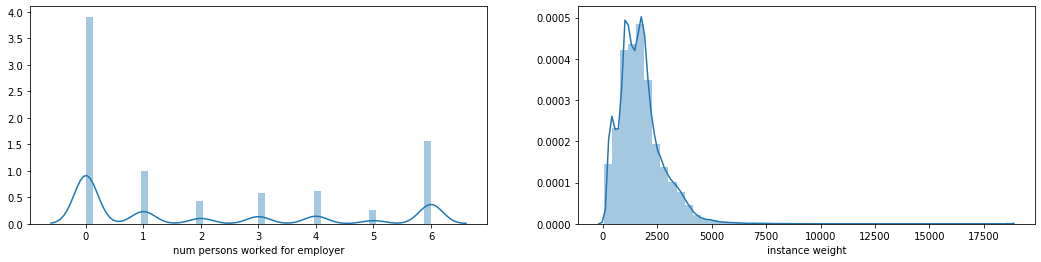

In [0]:
fig, axis = plt.subplots(1,2, figsize = (18,4))
sns.distplot(df_numeric['num persons worked for employer'], kde=True, ax=axis[0])
sns.distplot(df_numeric['instance weight'], kde=True, ax=axis[1])
plt.show()

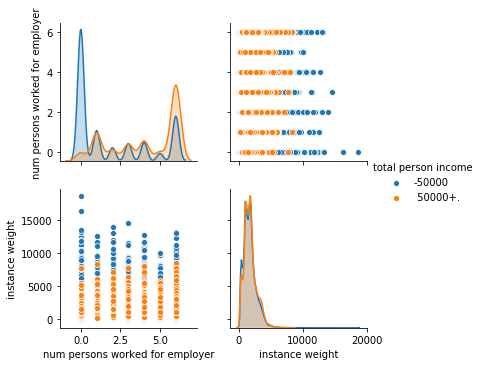

In [0]:
sns.pairplot(data=df_numeric, hue='total person income', diag_kind='kde')
plt.show()

## 1)num persons worked for employer:
Counting all locations where this employer operates, what is the total
number of persons who work for record's employer?

In [0]:
df['num persons worked for employer'].nunique()

7

In [0]:
df['num persons worked for employer'].value_counts()

0    137170
6     54830
1     34740
4     21433
3     20259
2     15157
5      8961
Name: num persons worked for employer, dtype: int64

#### Distribution of attribute in precentage

In [0]:
df['num persons worked for employer'].value_counts(normalize=True)*100

0    46.887712
6    18.742095
1    11.874893
4     7.326269
3     6.924970
2     5.180995
5     3.063066
Name: num persons worked for employer, dtype: float64

In [0]:
c_t=pd.crosstab(index=df['num persons worked for employer'], columns=df['total person income'],normalize=True)*100
c_t

total person income,50000+.,-50000
num persons worked for employer,,
0,0.309691,46.578021
1,1.054862,10.820031
2,0.421125,4.759870
3,0.639891,6.285079
4,0.751666,6.574603
5,0.344556,2.718510
6,2.825158,15.916937


 ##### these groups 0 to 6 represents following number of employees working under the employee record:
 - 0 : Not in universe
 - 1 : Under 10
 - 2 : 10 to  24
 - 3 : 25 to 99 
 - 4 : 100 to 499 
 - 5 : 500 to 999 
 - 6 : 1000+ 

- There are 46.88% overall data  with not in universe states that, these people are not having any one employer.
- There is 18.74% overall data with 1000+ employer , from that only 2.82% people are having income above 50k.
- 11.87% overall data with less than 10 employer and among that 1.05% are with above 50k income.
- 2 -10 to 24 Employers,
- 3 -25 to 99 Employers,
- 4 -100 to 499 Employers,
- 5 -500 to 999 Employers
- classes with  2,3,4,5 are having distribution below 1% in income above 50k

### 2) Instance weight

As per the  UCI data set report this columns should not be used for classification model, as this is just given for our reference, so we will drop this feature

###  Categorical data

In [0]:
df_categorical.columns

Index(['family members under 18', 'country of birth father',
       'country of birth mother', 'country of birth self', 'citizenship',
       'total person income'],
      dtype='object')

### 1)family members under 18

In [0]:
df_categorical['family members under 18'].value_counts(normalize=True) * 100

 Not in universe           73.996582
 Both parents present      17.908392
 Mother only present        6.306956
 Father only present        0.956760
 Neither parent present     0.831311
Name: family members under 18, dtype: float64

Text(0.5, 1.0, 'below 50k')

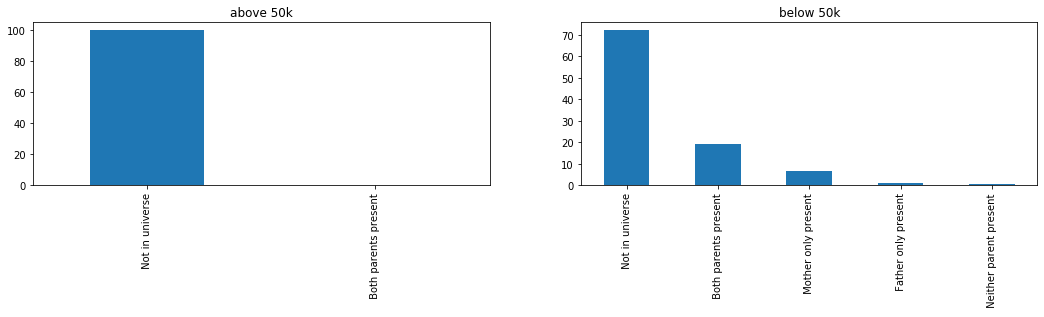

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']==' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']
fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['family members under 18'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['family members under 18'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')

In [0]:
df_categorical[(df_categorical['family members under 18']==' Both parents present')
               & (df_categorical['total person income']==' 50000+.')][['family members under 18','total person income']]

,family members under 18,total person income
20379,Both parents present,50000+.
96194,Both parents present,50000+.


In [0]:
c_t=pd.crosstab(index=df['family members under 18'], columns=df['total person income'],normalize=True)*100
c_t

total person income,50000+.,-50000
family members under 18,,
Both parents present,0.000684,17.907708
Father only present,0.000000,0.956760
Mother only present,0.000000,6.306956
Neither parent present,0.000000,0.831311
Not in universe,6.346266,67.650316


- 'family members under 18' is having data of parent present, which provide information about whether parents are present or not.
- from the distribution in bar plot and crosstab it can be seen that from the distribution it  does not contribute in income above 50k. 
- The distribution for above 50k is 0% for all the values except 'not in universe'.
- In the 'not in universe' 6.34% in above 50k which means is not applicable, since we cannot get any information from this column and it does not have any direct or indirect relation with total person income, so we can drop this column. 

### 2)country of birth father

In [0]:
df_categorical=df_categorical.replace(' ?',' others')

In [0]:
df_categorical['country of birth father'].value_counts()

 United-States                   232048
 Mexico                           14907
 others                           10120
 Puerto-Rico                       3959
 Italy                             3329
 Canada                            2039
 Germany                           2004
 Dominican-Republic                1960
 Poland                            1839
 Philippines                       1741
 Cuba                              1706
 El-Salvador                       1483
 China                             1249
 England                           1172
 Columbia                           904
 India                              884
 Ireland                            815
 South Korea                        784
 Jamaica                            710
 Vietnam                            673
 Guatemala                          672
 Japan                              598
 Portugal                           582
 Ecuador                            571
 Greece                             549


In [0]:
df_categorical['country of birth father'].value_counts(normalize=True)*100

 United-States                   79.319091
 Mexico                           5.095539
 others                           3.459238
 Puerto-Rico                      1.353273
 Italy                            1.137925
 Canada                           0.696975
 Germany                          0.685011
 Dominican-Republic               0.669971
 Poland                           0.628610
 Philippines                      0.595112
 Cuba                             0.583148
 El-Salvador                      0.506922
 China                            0.426936
 England                          0.400615
 Columbia                         0.309007
 India                            0.302171
 Ireland                          0.278585
 South Korea                      0.267988
 Jamaica                          0.242694
 Vietnam                          0.230046
 Guatemala                        0.229704
 Japan                            0.204410
 Portugal                         0.198940
 Ecuador   

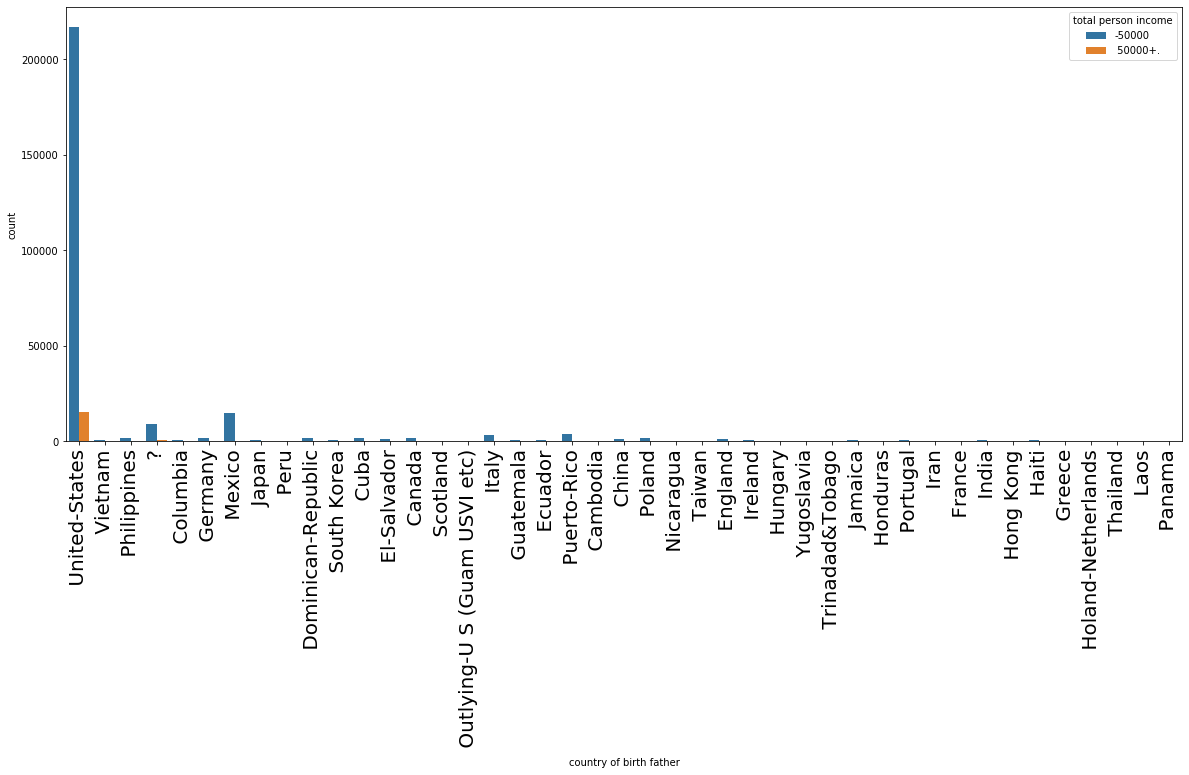

In [0]:
plt.figure(figsize=(20,8))
p=sns.countplot(x='country of birth father',hue='total person income',data=df)
p.set_xticklabels(p.get_xticklabels(), rotation=90,fontsize=20)
plt.show()

Text(0.5, 1.0, 'below 50k')

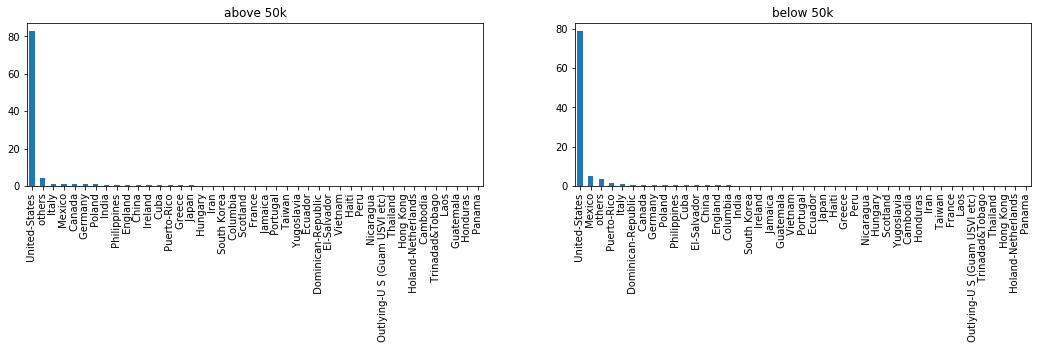

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']==' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']
fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['country of birth father'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['country of birth father'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')

In [0]:
c_t=pd.crosstab(index=df['country of birth father'], columns=df['total person income'],normalize=True)*100
c_t

total person income,50000+.,-50000
country of birth father,,
?,0.285421,3.173816
Cambodia,0.002393,0.103914
Canada,0.065630,0.631345
China,0.039310,0.387626
Columbia,0.010255,0.298752
Cuba,0.032815,0.550333
Dominican-Republic,0.005811,0.664160
Ecuador,0.006153,0.189028
El-Salvador,0.004786,0.502136


### 3)country of birth mother

In [0]:
df_categorical['country of birth mother'].value_counts(normalize=True)*100

 United-States                   79.989745
 Mexico                           4.998804
 others                           3.134165
 Puerto-Rico                      1.249701
 Italy                            0.942745
 Canada                           0.735943
 Germany                          0.703469
 Philippines                      0.639207
 Cuba                             0.580072
 Poland                           0.579046
 El-Salvador                      0.560246
 Dominican-Republic               0.557170
 England                          0.453939
 China                            0.384891
 Ireland                          0.320287
 South Korea                      0.307982
 Columbia                         0.307982
 India                            0.304563
 Japan                            0.249872
 Vietnam                          0.241326
 Jamaica                          0.239617
 Guatemala                        0.228679
 Ecuador                          0.196889
 Peru      

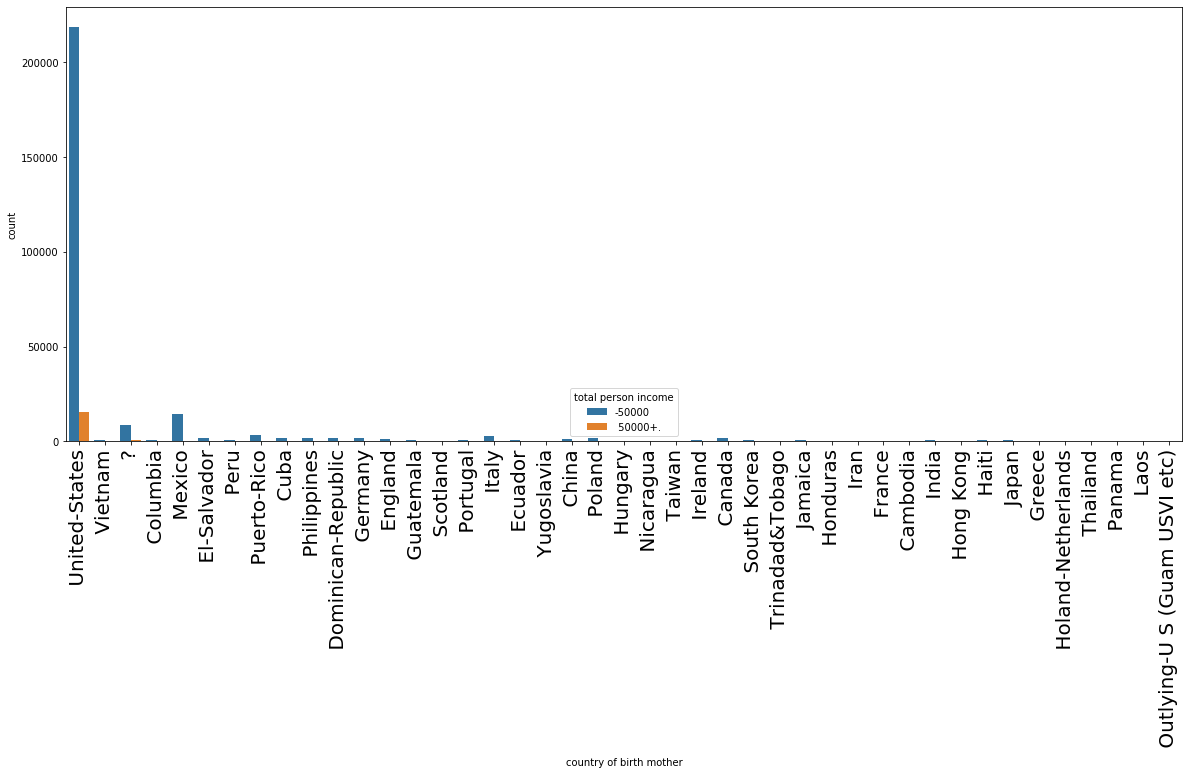

In [0]:
plt.figure(figsize=(20,8))
p=sns.countplot(x='country of birth mother',hue='total person income',data=df)
p.set_xticklabels(p.get_xticklabels(), rotation=90,fontsize=20)
plt.show()

Text(0.5, 1.0, 'below 50k')

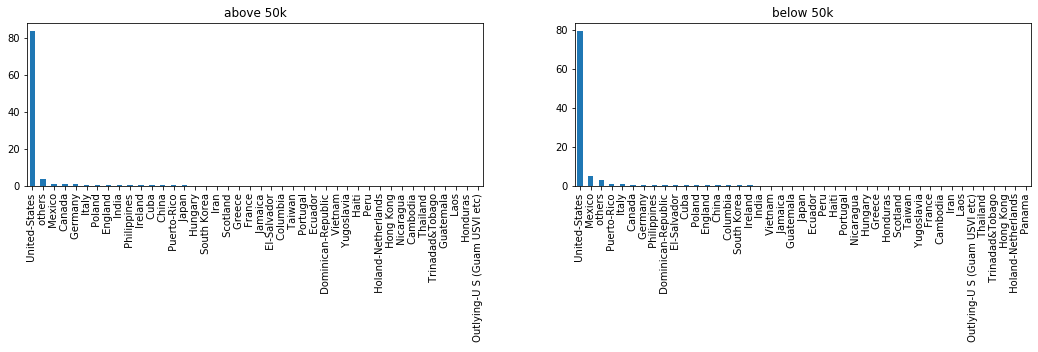

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']==' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']
fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['country of birth mother'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['country of birth mother'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')

In [0]:
c_t=pd.crosstab(index=df['country of birth mother'], columns=df['total person income'],normalize=True)*100
c_t

total person income,50000+.,-50000
country of birth mother,,
?,0.241668,2.892497
Cambodia,0.002735,0.084772
Canada,0.071783,0.664160
China,0.035208,0.349684
Columbia,0.008887,0.299094
Cuba,0.035208,0.544864
Dominican-Republic,0.004786,0.552384
Ecuador,0.006495,0.190395
El-Salvador,0.009229,0.551017


### 4)country of birth self

In [0]:
df_categorical['country of birth self'].value_counts(normalize=True)*100

 United-States                   88.414630
 Mexico                           2.969065
 others                           1.760383
 Puerto-Rico                      0.714750
 Philippines                      0.443685
 Germany                          0.434114
 Cuba                             0.432063
 Canada                           0.357546
 El-Salvador                      0.352418
 Dominican-Republic               0.345924
 China                            0.244403
 South Korea                      0.240984
 England                          0.232439
 Columbia                         0.220475
 Italy                            0.220475
 India                            0.212955
 Vietnam                          0.195522
 Poland                           0.188686
 Japan                            0.176722
 Guatemala                        0.173646
 Jamaica                          0.169544
 Ecuador                          0.133994
 Peru                             0.132969
 Nicaragua 

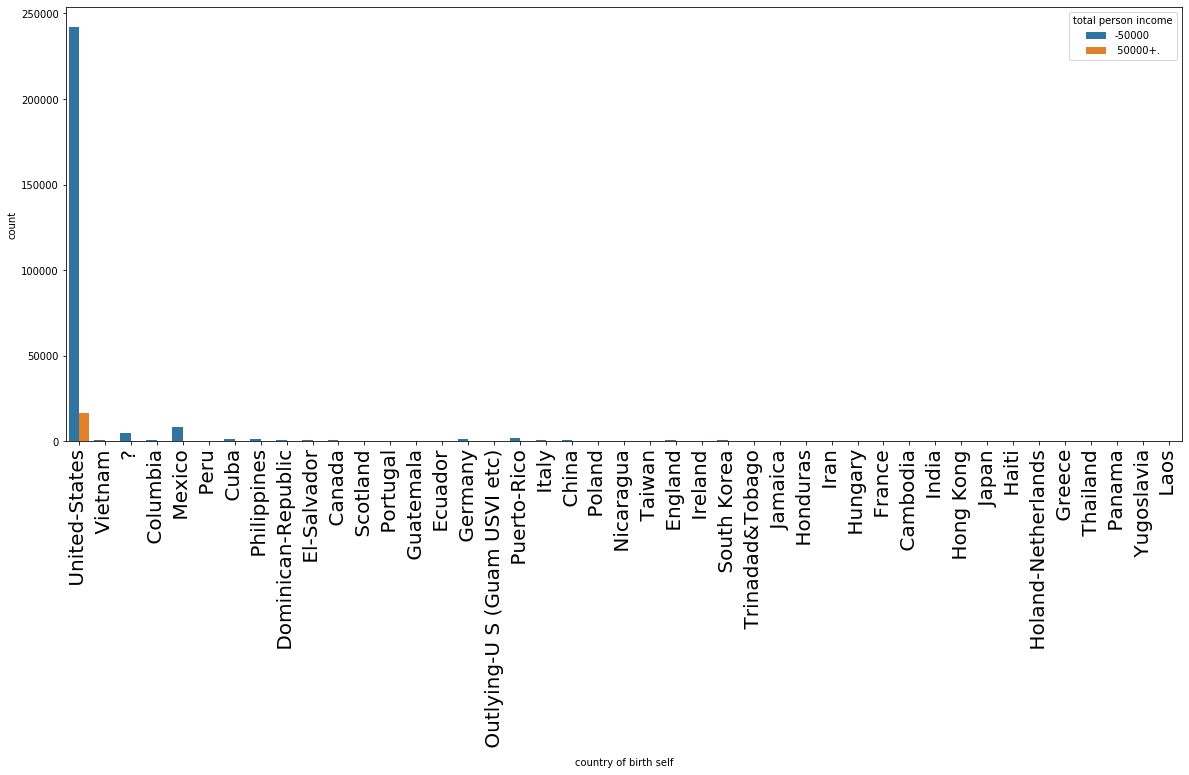

In [0]:
plt.figure(figsize=(20,8))
p=sns.countplot(x='country of birth self',hue='total person income',data=df)
p.set_xticklabels(p.get_xticklabels(), rotation=90,fontsize=20)
plt.show()

Text(0.5, 1.0, 'below 50k')

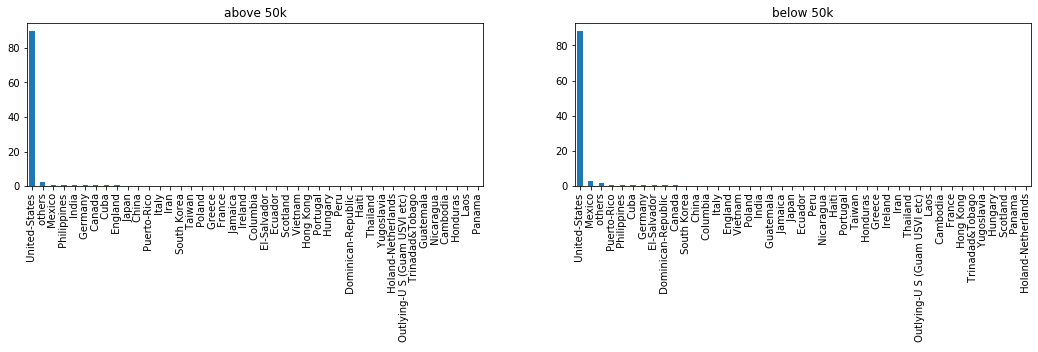

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']==' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']
fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['country of birth self'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['country of birth self'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')

In [0]:
c_t=pd.crosstab(index=df['country of birth self'], columns=df['total person income'],normalize=True)*100
c_t

total person income,50000+.,-50000
country of birth self,,
?,0.157580,1.602803
Cambodia,0.000684,0.052982
Canada,0.035208,0.322338
China,0.018117,0.226286
Columbia,0.007520,0.212955
Cuba,0.032473,0.399590
Dominican-Republic,0.004102,0.341822
Ecuador,0.005127,0.128867
El-Salvador,0.006153,0.346266


### 5)citizenship

In [0]:
df_categorical['citizenship'].value_counts(normalize=True)*100

 Native- Born in the United States              88.416339
 Foreign born- Not a citizen of U S              6.859682
 Foreign born- U S citizen by naturalization     3.028542
 Native- Born abroad of American Parent(s)       0.924286
 Native- Born in Puerto Rico or U S Outlying     0.771150
Name: citizenship, dtype: float64

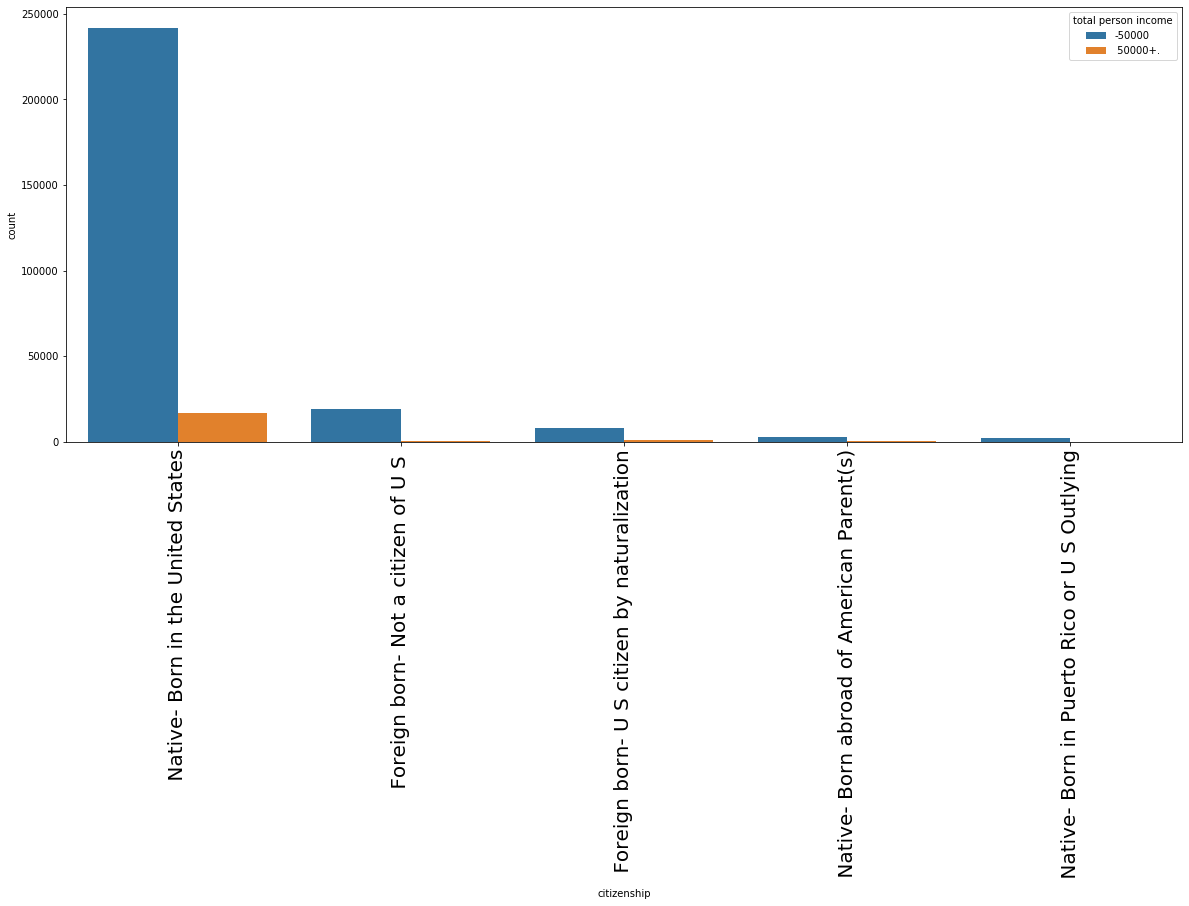

In [0]:
plt.figure(figsize=(20,8))
p=sns.countplot(x='citizenship',hue='total person income',data=df)
p.set_xticklabels(p.get_xticklabels(), rotation=90,fontsize=20)
plt.show()

Text(0.5, 1.0, 'below 50k')

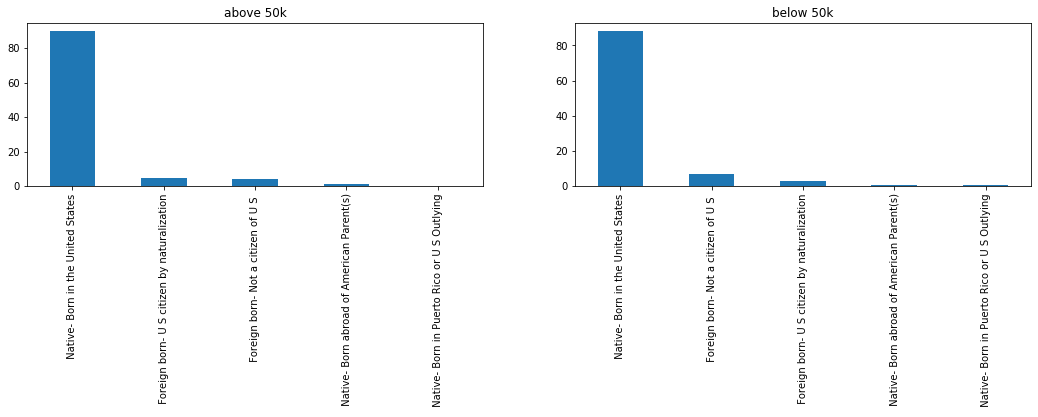

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']==' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']
fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['citizenship'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['citizenship'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')

In [0]:
c_t=pd.crosstab(index=df['citizenship'], columns=df['total person income'],normalize=True)*100
c_t

total person income,50000+.,-50000
citizenship,,
Foreign born- Not a citizen of U S,0.246454,6.613229
Foreign born- U S citizen by naturalization,0.307298,2.721244
Native- Born abroad of American Parent(s),0.063579,0.860708
Native- Born in Puerto Rico or U S Outlying,0.018117,0.753034
Native- Born in the United States,5.711502,82.704837


from the above 4 categorical columns 'country of birth father', 'country of birth mother', 'country of birth self',  this columns are representing countries of birth of self,mother ,father. 


Since this data is from United States bucketing can be done with these columns with as Native-United States and Foreigners as other than United states.



### BUCKETING AS PER COUNTRIES OF UNITED STATES AND OTHERS

In [0]:
cit_cols=['country of birth father','country of birth mother', 'country of birth self']
for i in cit_cols:
    print(i)
    df_categorical[i][df_categorical[i]==' United-States']='Native'
    df_categorical[i][df_categorical[i]!='Native']='Foreigner'

country of birth father
country of birth mother
country of birth self


In [0]:
df_categorical['Citizenship_combined']=np.nan

In [0]:
df['citizenship'].unique()

array([' Native- Born in the United States',
       ' Foreign born- Not a citizen of U S ',
       ' Foreign born- U S citizen by naturalization',
       ' Native- Born abroad of American Parent(s)',
       ' Native- Born in Puerto Rico or U S Outlying'], dtype=object)

In [0]:
df_categorical['Citizenship_combined'][(df_categorical['country of birth father']=='Native') &
                              (df_categorical['country of birth mother']=='Native') &
                              (df_categorical['country of birth self']=='Native')]='Native'
df_categorical['Citizenship_combined'][(df_categorical['country of birth father']=='Foreigner') &
                              (df_categorical['country of birth mother']=='Foreigner') &
                              (df_categorical['country of birth self']=='Native')]='Native-both_parents_foreign'
df_categorical['Citizenship_combined'][((df_categorical['country of birth father']=='Foreigner') & (df_categorical['country of birth mother']=='Native')) |
                               ((df_categorical['country of birth father']=='Native') & (df_categorical['country of birth mother']=='Foreigner')) & 
                              (df_categorical['country of birth self']=='Native')]='Native-single_parent_foreign'
df_categorical['Citizenship_combined'][df_categorical['country of birth self']=='Foreigner']=df_categorical['citizenship']


In [0]:
df_categorical['Citizenship_combined']=df_categorical['Citizenship_combined'].replace({'Foreign born':'Foreign_born'})
df_categorical['Citizenship_combined']=df_categorical['Citizenship_combined'].replace({' Foreign born- U S citizen by naturalization':'Foreign_born_naturalisation'})
df_categorical['Citizenship_combined']=df_categorical['Citizenship_combined'].replace({' Native- Born abroad of American Parent(s)':'Native-born_abroad'})
df_categorical['Citizenship_combined']=df_categorical['Citizenship_combined'].replace({' Native- Born in Puerto Rico or U S Outlying':'Native-born_abroad'})
df_categorical['Citizenship_combined']=df_categorical['Citizenship_combined'].replace({' Native- Born in the United States':'Foreign_born'})
df_categorical['Citizenship_combined']=df_categorical['Citizenship_combined'].replace({'Foreign_born':'Native-born_abroad'})

In [0]:
df_categorical['Citizenship_combined'].value_counts()

Native                                  223400
 Foreign born- Not a citizen of U S      20068
Native-both_parents_foreign              19691
Native-single_parent_foreign             15566
Foreign_born_naturalisation               8860
Native-born_abroad                        4965
Name: Citizenship_combined, dtype: int64

Text(0.5, 1.0, 'below 50k')

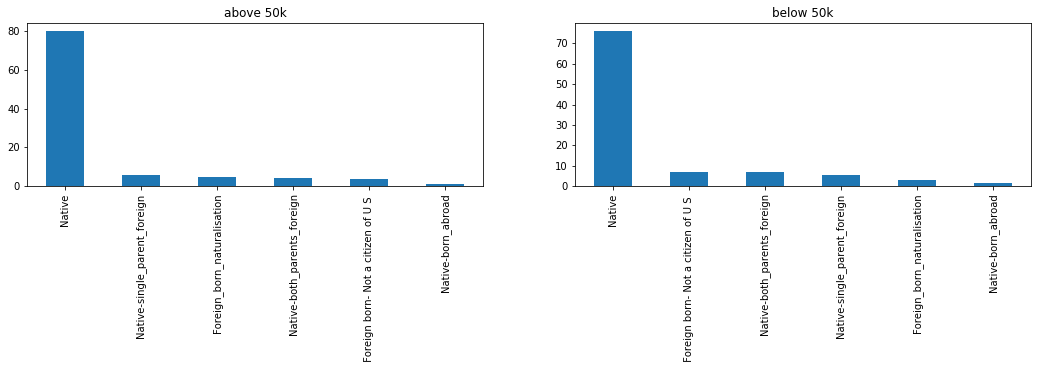

In [0]:
df_categorical_above50k = df_categorical[df_categorical['total person income']==' 50000+.']
df_categorical_below50k = df_categorical[df_categorical['total person income']== '-50000']
fig,axis = plt.subplots(1,2, figsize = (18,3))
(df_categorical_above50k['Citizenship_combined'].value_counts() / df_categorical_above50k.shape[0] * 100).plot(kind='bar',ax=axis[0])
(df_categorical_below50k['Citizenship_combined'].value_counts() / df_categorical_below50k.shape[0] * 100).plot(kind='bar',ax=axis[1])
axis[0].set_title('above 50k')
axis[1].set_title('below 50k')

In [0]:
c_t=pd.crosstab(index=df_categorical['Citizenship_combined'], columns=df['total person income'],normalize=True)*100
c_t

total person income,50000+.,-50000
Citizenship_combined,,
Foreign born- Not a citizen of U S,0.246454,6.613229
Foreign_born_naturalisation,0.307298,2.721244
Native,5.077081,71.285934
Native-born_abroad,0.081695,1.615450
Native-both_parents_foreign,0.275167,6.455649
Native-single_parent_foreign,0.359255,4.961545


__'Citizenship_combined'__ this new feature is created by combining the 'country of birth father','country of birth mother',
'country of birth self' and 'citizenship'

__1.__when country of birth father, mother, self is 'native' then category is __'native'__

__2.__when country of birth father and  mother is Foreigner and  self is Native then category is  __Native_bothparentsforgn__

__3.__when any one parent is native and self is native then category is __Native_singleparentforgn__

__4.__when mother, father , self is from foreign and citizenship is Foreign born- Not a citizen of U S then category is __Foreign born- Not a citizen of U S__

__5.__when self is foreigner but parents are native then category is __Native_born_abroad__.

__6.__when all mother,father,self are born in foreign then category is __Foreign_born_naturalisation__


__This is the final selected variables:__
- 'num persons worked for employer'
- 'Citizenship_combined'

In [0]:
final_df = pd.concat([final_df,df['num persons worked for employer']],axis=1)
final_df = pd.concat([final_df,df_categorical['Citizenship_combined']],axis=1)

In [0]:
final_df = pd.concat([final_df,census['total person income']],axis=1)
final_df.head()

,industry code,occupation code,class of worker,wage per hour,capital,divdends from stocks,marital status,race,sex,detailed household summary in household,age,weeks worked in year,education,full or part time employment stat,tax filer status,own business or self employed,veterans benefits,employment status,num persons worked for employer,Citizenship_combined,total person income
0,Not in universe,Not in universe,Not in universe,0,0,0,Single,White,Female,Other relative of householder,6,0,2,Not in labor force,Nonfiler,0,2,Not in universe,0,Native,-50000
1,Construction,"Precision production, craft and repair",Self-employed,0,0,0,Single,White,Male,Householder,5,2,2,Children or Armed Forces,Head of household,0,2,employed,1,Native,-50000
2,Unemployed or studying,Unemployed or studying,Unemployed or studying,0,0,0,Single,Minority,Female,Child 18 or older,2,0,2,Not in labor force,Nonfiler,0,2,Not in universe,0,Foreign born- Not a citizen of U S,-50000
3,Children,Children,Children,0,0,0,Single,White,Female,Child under 18 never married,1,0,0,Children or Armed Forces,Nonfiler,0,0,children,0,Native,-50000
4,Children,Children,Children,0,0,0,Single,White,Female,Child under 18 never married,1,0,0,Children or Armed Forces,Nonfiler,0,0,children,0,Native,-50000


In [0]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292550 entries, 0 to 292549
Data columns (total 21 columns):
industry code                              292550 non-null object
occupation code                            292550 non-null object
class of worker                            292550 non-null object
wage per hour                              292550 non-null int64
capital                                    292550 non-null int64
divdends from stocks                       292550 non-null int64
marital status                             292550 non-null object
race                                       292550 non-null object
sex                                        292550 non-null object
detailed household summary in household    292550 non-null object
age                                        292550 non-null int64
weeks worked in year                       292550 non-null int64
education                                  292550 non-null object
full or part time employment stat   

## LabelEncoding the data

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [0]:
final_df['industry code']=le.fit_transform(final_df['industry code'])
final_df['occupation code']=le.fit_transform(final_df['occupation code'])
final_df['class of worker']=le.fit_transform(final_df['class of worker'])
final_df['marital status']=le.fit_transform(final_df['marital status'])
final_df['race']=le.fit_transform(final_df['race'])
final_df['sex']=le.fit_transform(final_df['sex'])
final_df['detailed household summary in household']=le.fit_transform(final_df['detailed household summary in household'])
final_df['full or part time employment stat']=le.fit_transform(final_df['full or part time employment stat'])
final_df['tax filer status']=le.fit_transform(final_df['tax filer status'])
final_df['employment status']=le.fit_transform(final_df['employment status'])
final_df['Citizenship_combined']=le.fit_transform(final_df['Citizenship_combined'])
final_df['total person income']=le.fit_transform(final_df['total person income'])

In [0]:
final_df.nunique()

industry code                                13
occupation code                              10
class of worker                               9
wage per hour                              1425
capital                                     246
divdends from stocks                       1675
marital status                                2
race                                          3
sex                                           2
detailed household summary in household       8
age                                           6
weeks worked in year                          3
education                                     6
full or part time employment stat             8
tax filer status                              6
own business or self employed                 3
veterans benefits                             3
employment status                             6
num persons worked for employer               7
Citizenship_combined                          6
total person income                     

In [0]:
X= final_df.drop(['total person income','own business or self employed '],1)
y = final_df['total person income']

In [0]:
from imblearn.over_sampling import SMOTE
nm = SMOTE()
X,y=nm.fit_resample(X,y)

In [0]:
y.shape

(547964,)

In [0]:
X.shape

(547964, 19)

## KNN

In [0]:
# KNN
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors = 3)
#x,y = final_df.loc[:,final_df.columns != 'total person income'], final_df.loc[:,'total person income']
#knn.fit(x,y)

In [0]:
#prediction = knn.predict(x)

In [0]:
#print('With KNN (K=3) accuracy is: ',knn.score(x,prediction)) # accuracy

In [0]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()

In [0]:
#x=final_df.drop(['total person income','own business or self employed '],1)
#y=final_df['total person income']
#X= ss.fit_transform(x)

In [0]:
#clf = KNeighborsClassifier()

#clf.fit(X_train, y_train)

#y_pred = clf.predict(X_test)

In [0]:
#accuracy_score(y_test,y_pred)

In [0]:
#from sklearn.metrics import confusion_matrix, classification_report
#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))

In [0]:
#from sklearn.metrics import confusion_matrix, classification_report

#print(classification_report(y_test,y_pred))

In [0]:
# grid search cross validation with 1 hyperparameter
#from sklearn.model_selection import GridSearchCV
#grid = {'n_neighbors': np.arange(1,25)}
#knn = KNeighborsClassifier()
#knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
#knn_cv.fit(x,y)# Fit

# Print hyperparameter
#print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
#print("Best score: {}".format(knn_cv.best_score_))


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.3,random_state=1)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(383574, 19)
(164390, 19)
(383574,)
(164390,)


## LogisticRegression

In [0]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()

In [0]:
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
accuracy_score(y_test, y_pred)

0.8015998540057181

In [0]:
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[69022 13053]
 [19562 62753]]

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     82075
           1       0.83      0.76      0.79     82315

    accuracy                           0.80    164390
   macro avg       0.80      0.80      0.80    164390
weighted avg       0.80      0.80      0.80    164390



In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [0]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_1 = rfc.predict(X_test)

In [0]:
accuracy_score(y_test, y_pred_1)

0.9655271001885759

In [0]:
print(confusion_matrix(y_test,y_pred_1))
print()
print(classification_report(y_test,y_pred_1))

[[79148  2927]
 [ 2740 79575]]

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     82075
           1       0.96      0.97      0.97     82315

    accuracy                           0.97    164390
   macro avg       0.97      0.97      0.97    164390
weighted avg       0.97      0.97      0.97    164390



hyper parameter tunning


 ## 1.logistic regression

In [0]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=logr,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 53.1min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 77.7min finished


Best Score:  0.9204160582004828
Best Params:  {'C': 1, 'class_weight': {1: 0.6, 0: 0.4}, 'penalty': 'l1', 'solver': 'liblinear'}


In [0]:
logr = LogisticRegression(C = 1.0, class_weight = {1: 0.6, 0: 0.4}, penalty = 'l1', solver = 'liblinear')

In [0]:
logr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={0: 0.4, 1: 0.6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred_t1= logr.predict(X_test)

In [0]:
accuracy_score(y_test,y_pred_t1)

0.8360119228663544

In [0]:
print(confusion_matrix(y_test,y_pred_t1))
print()
print(classification_report(y_test,y_pred_t1))

[[67434 14641]
 [12317 69998]]

              precision    recall  f1-score   support

           0       0.85      0.82      0.83     82075
           1       0.83      0.85      0.84     82315

    accuracy                           0.84    164390
   macro avg       0.84      0.84      0.84    164390
weighted avg       0.84      0.84      0.84    164390



## Random Hyperparameter Grid on Random Forest
- To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]



# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 10 * 2 * 12 * 3 * 3 * 2 = 4320 settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

## Random Search Training
Now, we instantiate the random search and fit it like any Scikit-Learn model:

In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
#rfc = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rfc_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 186.5min
